In [1]:
!pip install mudata
!pip install muon
!pip install mudatasets

### Importing modules and settings

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import mudata as md
import muon as mu
import mudatasets as mds
import seaborn as sns
import scanpy.external as sce

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from matplotlib.pyplot import rc_context

General settings of Scanpy

In [4]:
sc.settings.verbosity = 4
sc.logging.print_header()
sc.settings.set_figure_params(dpi=90, transparent = True, format = 'pdf', vector_friendly = True)

scanpy==1.9.2 anndata==0.9.2 umap==0.5.6 numpy==1.24.4 scipy==1.10.1 pandas==1.5.1 scikit-learn==1.3.2 statsmodels==0.14.1 python-igraph==0.11.6 pynndescent==0.5.13


In [5]:
umap_cmap = sns.light_palette('xkcd:blurple', as_cmap = True)

### Declaring the input files

In [6]:
mdata = mu.read('/Users/helenhorkan/Atlas/hydractinia_atlas_colored_20230825.h5mu')

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [7]:
mdata

MuData object with n_obs × n_vars = 277529 × 41187
  2 modalities
    with:	277529 x 23126
      obs:	'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'Colony_part', 'Unique'
      var:	'ratio_with_no'
    no:	199113 x 18061
      obs:	'Experiment', 'Library', 'Body_part', 'Presence_of_PEG', 'batch', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_1.5', 'leiden_2', 'Colony_part', 'Unique', 'leiden_1.5_names', 'broad_names'
      var:	'ratio_with_no', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'Colony_part_colors', 'Library_colors', 'broad_names_colors', 'dendrogram_leiden_1.5', 'hvg', 'leiden', 'leiden_1.5_colors', 'leiden_1.5_colors_sorted', 'leiden_1.5_sorted', 'leiden_1_colors', 'leiden_2_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_1.5', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_wilcox_leiden_1', 'rank_genes_groups_wilcox_leiden_1.5', 'rank_genes_groups_wilcox_leiden_2', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [8]:
mdata.obs

with:Experiment with:Library with:Body_part  \
AGAGTCAAAATGTTGCAAACATCG-0-0          lib_29     lib_29_1         Polyps   
CTGTAGCCAAACATCGGACTAGTA-0-0          lib_29     lib_29_1         Polyps   
CGAACTTACAAGACTAACAGATTC-0-0          lib_29     lib_29_1         Polyps   
AGAGTCAACGACACACGATAGACA-0-0          lib_29     lib_29_1         Polyps   
CGCTGATCATGCCTAACCGTGAGA-0-0          lib_29     lib_29_1         Polyps   
...                                      ...          ...            ...   
AAGGTACACACCTTACCAGCGTTA-3-1          lib_20     lib_20_4         Polyps   
GAATCTGAACAAGCTATGAAGAGA-3-1          lib_20     lib_20_4         Polyps   
CTGGCATATGGCTTCACATACCAA-3-1          lib_20     lib_20_4         Polyps   
CTGGCATAAACTCACCCATACCAA-3-1          lib_20     lib_20_4         Polyps   
ACACAGAAGGAGAACAATAGCGAC-3-1          lib_20     lib_20_4        Stolons   

                             with:Presence_of_PEG with:batch with:Colony_part  \
AGAGTCAAAATGTTGCAAACATCG-0-0                  PEG          3     Polyp_Sexual   
CTGTAGCCAAACATCGGACTAGTA-0-0                  PEG          3     Polyp_Sexual   
CGAACTTACAAGACTAACAGATTC-0-0                  PEG          3     Polyp_Sexual   
AGAGTCAACGACACACGATAGACA-0-0                  PEG          3     Polyp_Sexual   
CGCTGATCATGCCTAACCGTGAGA-0-0                  PEG          3     Polyp_Sexual   
...                                           ...        ...              ...   
AAGGTACACACCTTACCAGCGTTA-3-1                  PEG          1        Polyp_Mix   
GAATCTGAACAAGCTATGAAGAGA-3-1                  PEG          1        Polyp_Mix   
CTGGCATATGGCTTCACATACCAA-3-1                  PEG          1        Polyp_Mix   
CTGGCATAAACTCACCCATACCAA-3-1                  PEG          1        Polyp_Mix   
ACACAGAAGGAGAACAATAGCGAC-3-1                  PEG          1           Stolon   

                                                   with:Unique no:Experiment  \
AGAGTCAAAATGTTGCAAACATCG-0-0  lib_29_1_Polyps_Polyp_Sexual_PEG           NaN   
CTGTAGCCAAACATCGGACTAGTA-0-0  lib_29_1_Polyps_Polyp_Sexual_PEG        lib_29   
CGAACTTACAAGACTAACAGATTC-0-0  lib_29_1_Polyps_Polyp_Sexual_PEG        lib_29   
AGAGTCAACGACACACGATAGACA-0-0  lib_29_1_Polyps_Polyp_Sexual_PEG        lib_29   
CGCTGATCATGCCTAACCGTGAGA-0-0  lib_29_1_Polyps_Polyp_Sexual_PEG           NaN   
...                                                        ...           ...   
AAGGTACACACCTTACCAGCGTTA-3-1     lib_20_4_Polyps_Polyp_Mix_PEG        lib_20   
GAATCTGAACAAGCTATGAAGAGA-3-1     lib_20_4_Polyps_Polyp_Mix_PEG        lib_20   
CTGGCATATGGCTTCACATACCAA-3-1     lib_20_4_Polyps_Polyp_Mix_PEG        lib_20   
CTGGCATAAACTCACCCATACCAA-3-1     lib_20_4_Polyps_Polyp_Mix_PEG        lib_20   
ACACAGAAGGAGAACAATAGCGAC-3-1       lib_20_4_Stolons_Stolon_PEG           NaN   

                             no:Library no:Body_part  ... no:total_counts  \
AGAGTCAAAATGTTGCAAACATCG-0-0        NaN          NaN  ...             NaN   
CTGTAGCCAAACATCGGACTAGTA-0-0   lib_29_1       Polyps  ...            52.0   
CGAACTTACAAGACTAACAGATTC-0-0   lib_29_1       Polyps  ...           109.0   
AGAGTCAACGACACACGATAGACA-0-0   lib_29_1       Polyps  ...           124.0   
CGCTGATCATGCCTAACCGTGAGA-0-0        NaN          NaN  ...             NaN   
...                                 ...          ...  ...             ...   
AAGGTACACACCTTACCAGCGTTA-3-1   lib_20_4       Polyps  ...            58.0   
GAATCTGAACAAGCTATGAAGAGA-3-1   lib_20_4       Polyps  ...           287.0   
CTGGCATATGGCTTCACATACCAA-3-1   lib_20_4       Polyps  ...           326.0   
CTGGCATAAACTCACCCATACCAA-3-1   lib_20_4       Polyps  ...            91.0   
ACACAGAAGGAGAACAATAGCGAC-3-1        NaN          NaN  ...             NaN   

                             no:total_counts_mt  no:pct_counts_mt  \
AGAGTCAAAATGTTGCAAACATCG-0-0                NaN               NaN   
CTGTAGCCAAACATCGGACTAGTA-0-0                0.0               0.0   
CGAACTTACAAGACTAACAGATTC-0-0                0.0   

In [9]:
mdataS = mdata[mdata.obs['with:Colony_part'] == 'Polyp_Sexual']

In [10]:
mdataF = mdata[mdata.obs['with:Colony_part'] == 'Polyp_Feeding']

In [11]:
markers_dic={'LOC130621448':'LOC130621448',
            'LOC130657176':'LOC130657176',
            'LOC130656781':'LOC130656781',
            'LOC130622391':'LOC130622391',
            'LOC130641987':'LOC130641987',
            'LOC130641567':'LOC130641567',
            'LOC130641160':'LOC130641160',
            'LOC130640782':'LOC130640782',
            'LOC130628587':'LOC130628587',
            'LOC130644882':'LOC130644882',
            'LOC130622202':'LOC130622202',
            'LOC130657738':'LOC130657738',
            'LOC130622693':'LOC130622693'}

In [12]:
markers_id=list(markers_dic.values())
markers_names=list(markers_dic.keys())

In [13]:
df= ((mdata.mod['no']).var[(mdata.mod['no']).var.index.isin(markers_id)])

In [14]:
dfS= ((mdataS.mod['no']).var[(mdataS.mod['no']).var.index.isin(markers_id)])

In [15]:
dfF= ((mdataF.mod['no']).var[(mdataF.mod['no']).var.index.isin(markers_id)])

In [16]:
minusdfS = (mdataS.mod['no']).var[~(mdataS.mod['no']).var.index.isin(markers_id)]

In [17]:
minusdfF = (mdataF.mod['no']).var[~(mdataF.mod['no']).var.index.isin(markers_id)]

In [18]:
minusdf = (mdata.mod['no']).var[~(mdata.mod['no']).var.index.isin(markers_id)]

In [19]:
dft= (mdata.mod['no']).raw.var[(mdata.mod['no']).raw.var.index.isin(markers_id)]

In [20]:
dftS= (mdataS.mod['no']).raw.var[(mdataS.mod['no']).raw.var.index.isin(markers_id)]

In [21]:
dftF= (mdataF.mod['no']).raw.var[(mdataF.mod['no']).raw.var.index.isin(markers_id)]

In [22]:
list(set(markers_dic.values())-set(dft.index))

[]

In [23]:
list(set(markers_dic.values())-set(dftS.index))

[]

In [24]:
list(set(markers_dic.values())-set(dftF.index))

[]

In [25]:
minusdf

ratio_with_no     mt  n_cells_by_counts  mean_counts  \
LOC130612030        1.119558  False                 10     0.000050   
LOC130612033        1.346984  False                125     0.000664   
LOC130612034        1.429284  False                201     0.001179   
LOC130612035        1.428458  False                520     0.002733   
LOC130612036        1.145483  False              12870     0.074044   
...                      ...    ...                ...          ...   
Trnav-cac_103       1.071283  False                  0     0.000000   
Trnaw-cca_146       1.071283  False                  0     0.000000   
Trnaw-cca_167       1.071283  False                  1     0.000005   
Trnay-gua_152       1.060409  False                  5     0.000025   
Trnay-gua_17        1.315169  False                  2     0.000010   

               pct_dropout_by_counts  total_counts  highly_variable  \
LOC130612030               99.995004          10.0             True   
LOC130612033               99.937556         133.0             True   
LOC130612034               99.899590         236.0             True   
LOC130612035               99.740232         547.0             True   
LOC130612036               93.570754       14822.0             True   
...                              ...           ...              ...   
Trnav-cac_103             100.000000           0.0             True   
Trnaw-cca_146             100.000000           0.0             True   
Trnaw-cca_167              99.999500           1.0             True   
Trnay-gua_152              99.997502           5.0             True   
Trnay-gua_17               99.999001           2.0             True   

                      means  dispersions  dispersions_norm      mean       std  
LOC130612030   4.273221e-03     4.748613          0.593155  0.000216  0.030688  
LOC130612033   5.228799e-02     4.743840          0.575159  0.002655  0.107926  
LOC130612034   6.864602e-02     4.772200          0.682099  0.003954  0.128323  
LOC130612035   1.784180e-01     4.663227          0.271175  0.010625  0.212273  
LOC130612036   1.815345e+00     4.691698         -0.360676  0.267720  1.040346  
...                     ...          ...               ...       ...       ...  
Trnav-cac_103  1.000000e-12          NaN               NaN  0.000000  1.000000  
Trnaw-cca_146  1.000000e-12          NaN               NaN  0.000000  1.000000  
Trnaw-cca_167  6.355289e-04     4.840893          0.941132  0.000024  0.010866  
Trnay-gua_152  1.554264e-03     4.499506         -0.346198  0.000086  0.019270  
Trnay-gua_17   8.080944e-04     4.788746          0.744493  0.000041  0.013188  

[18049 rows x 12 columns]

In [26]:
minusdfS

ratio_with_no     mt  n_cells_by_counts  mean_counts  \
LOC130612030        1.119558  False                 10     0.000050   
LOC130612033        1.346984  False                125     0.000664   
LOC130612034        1.429284  False                201     0.001179   
LOC130612035        1.428458  False                520     0.002733   
LOC130612036        1.145483  False              12870     0.074044   
...                      ...    ...                ...          ...   
Trnav-cac_103       1.071283  False                  0     0.000000   
Trnaw-cca_146       1.071283  False                  0     0.000000   
Trnaw-cca_167       1.071283  False                  1     0.000005   
Trnay-gua_152       1.060409  False                  5     0.000025   
Trnay-gua_17        1.315169  False                  2     0.000010   

               pct_dropout_by_counts  total_counts  highly_variable  \
LOC130612030               99.995004          10.0             True   
LOC130612033               99.937556         133.0             True   
LOC130612034               99.899590         236.0             True   
LOC130612035               99.740232         547.0             True   
LOC130612036               93.570754       14822.0             True   
...                              ...           ...              ...   
Trnav-cac_103             100.000000           0.0             True   
Trnaw-cca_146             100.000000           0.0             True   
Trnaw-cca_167              99.999500           1.0             True   
Trnay-gua_152              99.997502           5.0             True   
Trnay-gua_17               99.999001           2.0             True   

                      means  dispersions  dispersions_norm      mean       std  
LOC130612030   4.273221e-03     4.748613          0.593155  0.000216  0.030688  
LOC130612033   5.228799e-02     4.743840          0.575159  0.002655  0.107926  
LOC130612034   6.864602e-02     4.772200          0.682099  0.003954  0.128323  
LOC130612035   1.784180e-01     4.663227          0.271175  0.010625  0.212273  
LOC130612036   1.815345e+00     4.691698         -0.360676  0.267720  1.040346  
...                     ...          ...               ...       ...       ...  
Trnav-cac_103  1.000000e-12          NaN               NaN  0.000000  1.000000  
Trnaw-cca_146  1.000000e-12          NaN               NaN  0.000000  1.000000  
Trnaw-cca_167  6.355289e-04     4.840893          0.941132  0.000024  0.010866  
Trnay-gua_152  1.554264e-03     4.499506         -0.346198  0.000086  0.019270  
Trnay-gua_17   8.080944e-04     4.788746          0.744493  0.000041  0.013188  

[18049 rows x 12 columns]

In [27]:
minusdfF

ratio_with_no     mt  n_cells_by_counts  mean_counts  \
LOC130612030        1.119558  False                 10     0.000050   
LOC130612033        1.346984  False                125     0.000664   
LOC130612034        1.429284  False                201     0.001179   
LOC130612035        1.428458  False                520     0.002733   
LOC130612036        1.145483  False              12870     0.074044   
...                      ...    ...                ...          ...   
Trnav-cac_103       1.071283  False                  0     0.000000   
Trnaw-cca_146       1.071283  False                  0     0.000000   
Trnaw-cca_167       1.071283  False                  1     0.000005   
Trnay-gua_152       1.060409  False                  5     0.000025   
Trnay-gua_17        1.315169  False                  2     0.000010   

               pct_dropout_by_counts  total_counts  highly_variable  \
LOC130612030               99.995004          10.0             True   
LOC130612033               99.937556         133.0             True   
LOC130612034               99.899590         236.0             True   
LOC130612035               99.740232         547.0             True   
LOC130612036               93.570754       14822.0             True   
...                              ...           ...              ...   
Trnav-cac_103             100.000000           0.0             True   
Trnaw-cca_146             100.000000           0.0             True   
Trnaw-cca_167              99.999500           1.0             True   
Trnay-gua_152              99.997502           5.0             True   
Trnay-gua_17               99.999001           2.0             True   

                      means  dispersions  dispersions_norm      mean       std  
LOC130612030   4.273221e-03     4.748613          0.593155  0.000216  0.030688  
LOC130612033   5.228799e-02     4.743840          0.575159  0.002655  0.107926  
LOC130612034   6.864602e-02     4.772200          0.682099  0.003954  0.128323  
LOC130612035   1.784180e-01     4.663227          0.271175  0.010625  0.212273  
LOC130612036   1.815345e+00     4.691698         -0.360676  0.267720  1.040346  
...                     ...          ...               ...       ...       ...  
Trnav-cac_103  1.000000e-12          NaN               NaN  0.000000  1.000000  
Trnaw-cca_146  1.000000e-12          NaN               NaN  0.000000  1.000000  
Trnaw-cca_167  6.355289e-04     4.840893          0.941132  0.000024  0.010866  
Trnay-gua_152  1.554264e-03     4.499506         -0.346198  0.000086  0.019270  
Trnay-gua_17   8.080944e-04     4.788746          0.744493  0.000041  0.013188  

[18049 rows x 12 columns]

In [28]:
df

ratio_with_no     mt  n_cells_by_counts  mean_counts  \
LOC130621448       1.107157  False                935     0.004946   
LOC130622202       1.095566  False                697     0.003672   
LOC130622391       1.127735  False                772     0.004116   
LOC130622693       1.101026  False               1648     0.008702   
LOC130628587       1.187587  False               1588     0.008223   
LOC130640782       1.449912  False                457     0.002368   
LOC130641160       1.771010  False                300     0.001534   
LOC130641567       1.200326  False               5456     0.029623   
LOC130641987       1.103636  False               1502     0.008368   
LOC130644882       1.281257  False               1162     0.006115   
LOC130656781       1.169895  False                397     0.002058   
LOC130657738       1.443342  False                 95     0.000490   

              pct_dropout_by_counts  total_counts  highly_variable     means  \
LOC130621448              99.532918         990.0             True  0.279644   
LOC130622202              99.651812         735.0             True  0.235326   
LOC130622391              99.614345         824.0             True  0.276066   
LOC130622693              99.176737        1742.0             True  0.468674   
LOC130628587              99.206710        1646.0             True  0.474468   
LOC130640782              99.771704         474.0             True  0.153533   
LOC130641160              99.850134         307.0             True  0.100267   
LOC130641567              97.274439        5930.0             True  1.129422   
LOC130641987              99.249672        1675.0             True  0.445393   
LOC130644882              99.419520        1224.0             True  0.353472   
LOC130656781              99.801677         412.0             True  0.130048   
LOC130657738              99.952542          98.0             True  0.032438   

              dispersions  dispersions_norm      mean       std  
LOC130621448     4.618395         -0.435532  0.018436  0.277003  
LOC130622202     4.674856          0.028369  0.014275  0.246407  
LOC130622391     4.775336          0.853948  0.016098  0.263853  
LOC130622693     4.640694         -0.377355  0.033296  0.373285  
LOC130628587     4.662582         -0.226133  0.032738  0.372343  
LOC130640782     4.623893          0.122850  0.009310  0.197893  
LOC130641160     4.586182         -0.019354  0.006059  0.159294  
LOC130641567     4.664648         -0.379881  0.112202  0.683629  
LOC130641987     4.726271          0.213910  0.030557  0.358771  
LOC130644882     4.639462         -0.262444  0.023529  0.314510  
LOC130656781     4.653917          0.236068  0.007874  0.181443  
LOC130657738     4.587613         -0.013955  0.001867  0.088731

In [29]:
dfS

ratio_with_no     mt  n_cells_by_counts  mean_counts  \
LOC130621448       1.107157  False                935     0.004946   
LOC130622202       1.095566  False                697     0.003672   
LOC130622391       1.127735  False                772     0.004116   
LOC130622693       1.101026  False               1648     0.008702   
LOC130628587       1.187587  False               1588     0.008223   
LOC130640782       1.449912  False                457     0.002368   
LOC130641160       1.771010  False                300     0.001534   
LOC130641567       1.200326  False               5456     0.029623   
LOC130641987       1.103636  False               1502     0.008368   
LOC130644882       1.281257  False               1162     0.006115   
LOC130656781       1.169895  False                397     0.002058   
LOC130657738       1.443342  False                 95     0.000490   

              pct_dropout_by_counts  total_counts  highly_variable     means  \
LOC130621448              99.532918         990.0             True  0.279644   
LOC130622202              99.651812         735.0             True  0.235326   
LOC130622391              99.614345         824.0             True  0.276066   
LOC130622693              99.176737        1742.0             True  0.468674   
LOC130628587              99.206710        1646.0             True  0.474468   
LOC130640782              99.771704         474.0             True  0.153533   
LOC130641160              99.850134         307.0             True  0.100267   
LOC130641567              97.274439        5930.0             True  1.129422   
LOC130641987              99.249672        1675.0             True  0.445393   
LOC130644882              99.419520        1224.0             True  0.353472   
LOC130656781              99.801677         412.0             True  0.130048   
LOC130657738              99.952542          98.0             True  0.032438   

              dispersions  dispersions_norm      mean       std  
LOC130621448     4.618395         -0.435532  0.018436  0.277003  
LOC130622202     4.674856          0.028369  0.014275  0.246407  
LOC130622391     4.775336          0.853948  0.016098  0.263853  
LOC130622693     4.640694         -0.377355  0.033296  0.373285  
LOC130628587     4.662582         -0.226133  0.032738  0.372343  
LOC130640782     4.623893          0.122850  0.009310  0.197893  
LOC130641160     4.586182         -0.019354  0.006059  0.159294  
LOC130641567     4.664648         -0.379881  0.112202  0.683629  
LOC130641987     4.726271          0.213910  0.030557  0.358771  
LOC130644882     4.639462         -0.262444  0.023529  0.314510  
LOC130656781     4.653917          0.236068  0.007874  0.181443  
LOC130657738     4.587613         -0.013955  0.001867  0.088731

In [30]:
dfF

ratio_with_no     mt  n_cells_by_counts  mean_counts  \
LOC130621448       1.107157  False                935     0.004946   
LOC130622202       1.095566  False                697     0.003672   
LOC130622391       1.127735  False                772     0.004116   
LOC130622693       1.101026  False               1648     0.008702   
LOC130628587       1.187587  False               1588     0.008223   
LOC130640782       1.449912  False                457     0.002368   
LOC130641160       1.771010  False                300     0.001534   
LOC130641567       1.200326  False               5456     0.029623   
LOC130641987       1.103636  False               1502     0.008368   
LOC130644882       1.281257  False               1162     0.006115   
LOC130656781       1.169895  False                397     0.002058   
LOC130657738       1.443342  False                 95     0.000490   

              pct_dropout_by_counts  total_counts  highly_variable     means  \
LOC130621448              99.532918         990.0             True  0.279644   
LOC130622202              99.651812         735.0             True  0.235326   
LOC130622391              99.614345         824.0             True  0.276066   
LOC130622693              99.176737        1742.0             True  0.468674   
LOC130628587              99.206710        1646.0             True  0.474468   
LOC130640782              99.771704         474.0             True  0.153533   
LOC130641160              99.850134         307.0             True  0.100267   
LOC130641567              97.274439        5930.0             True  1.129422   
LOC130641987              99.249672        1675.0             True  0.445393   
LOC130644882              99.419520        1224.0             True  0.353472   
LOC130656781              99.801677         412.0             True  0.130048   
LOC130657738              99.952542          98.0             True  0.032438   

              dispersions  dispersions_norm      mean       std  
LOC130621448     4.618395         -0.435532  0.018436  0.277003  
LOC130622202     4.674856          0.028369  0.014275  0.246407  
LOC130622391     4.775336          0.853948  0.016098  0.263853  
LOC130622693     4.640694         -0.377355  0.033296  0.373285  
LOC130628587     4.662582         -0.226133  0.032738  0.372343  
LOC130640782     4.623893          0.122850  0.009310  0.197893  
LOC130641160     4.586182         -0.019354  0.006059  0.159294  
LOC130641567     4.664648         -0.379881  0.112202  0.683629  
LOC130641987     4.726271          0.213910  0.030557  0.358771  
LOC130644882     4.639462         -0.262444  0.023529  0.314510  
LOC130656781     4.653917          0.236068  0.007874  0.181443  
LOC130657738     4.587613         -0.013955  0.001867  0.088731

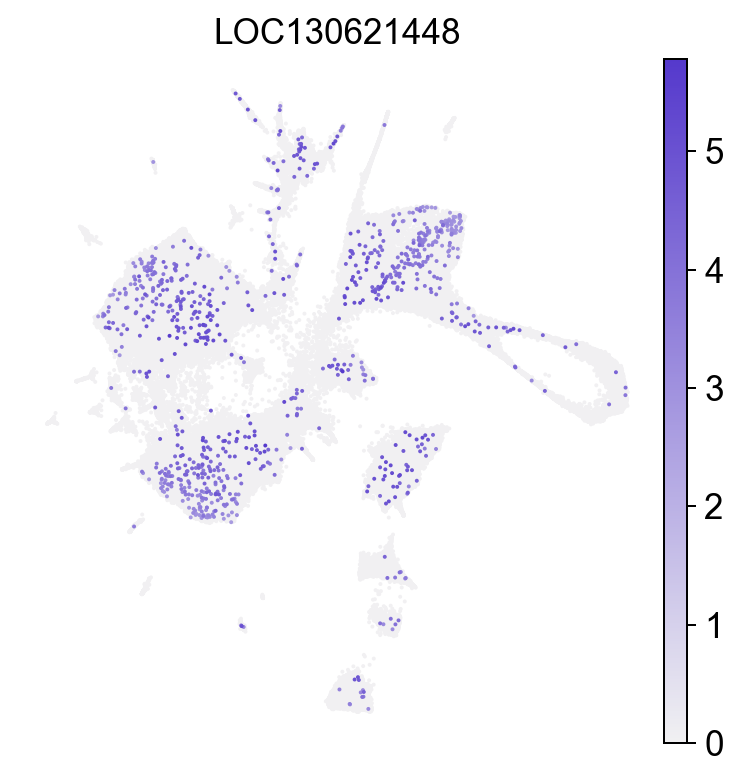

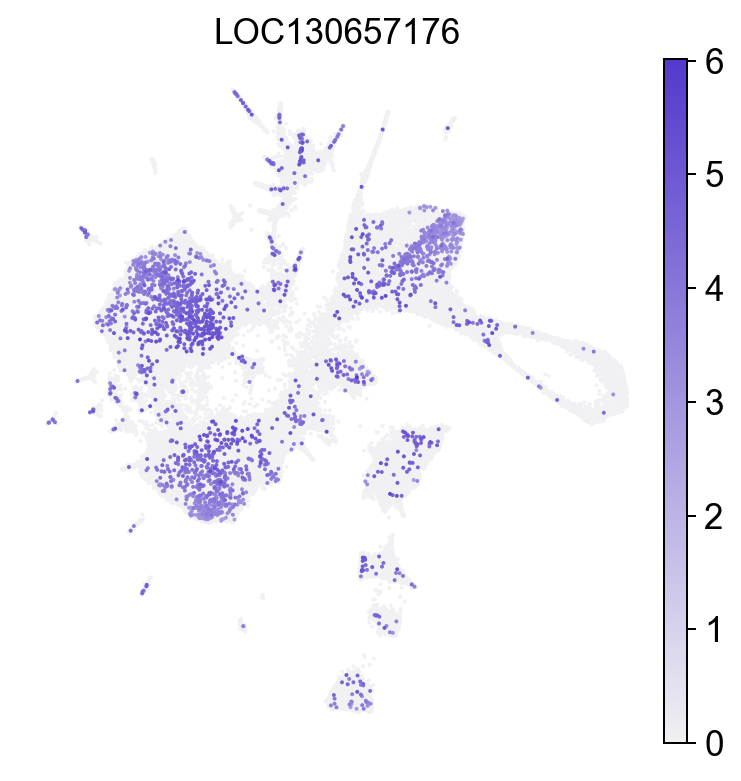

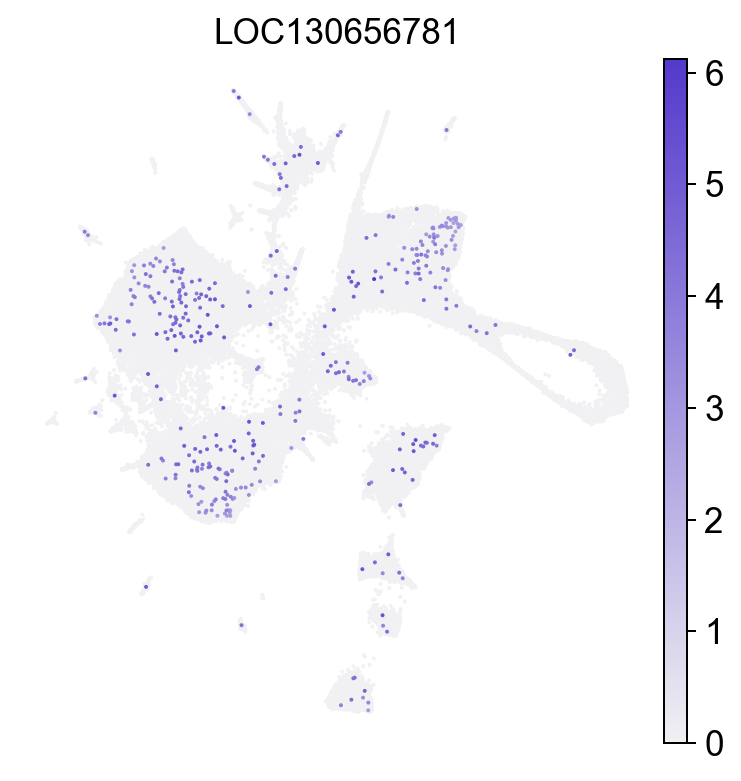

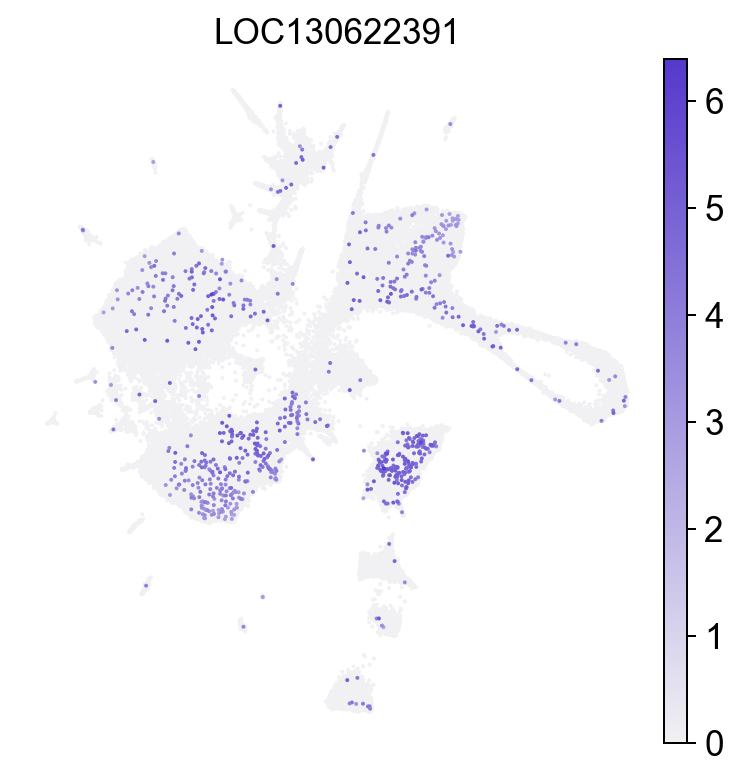

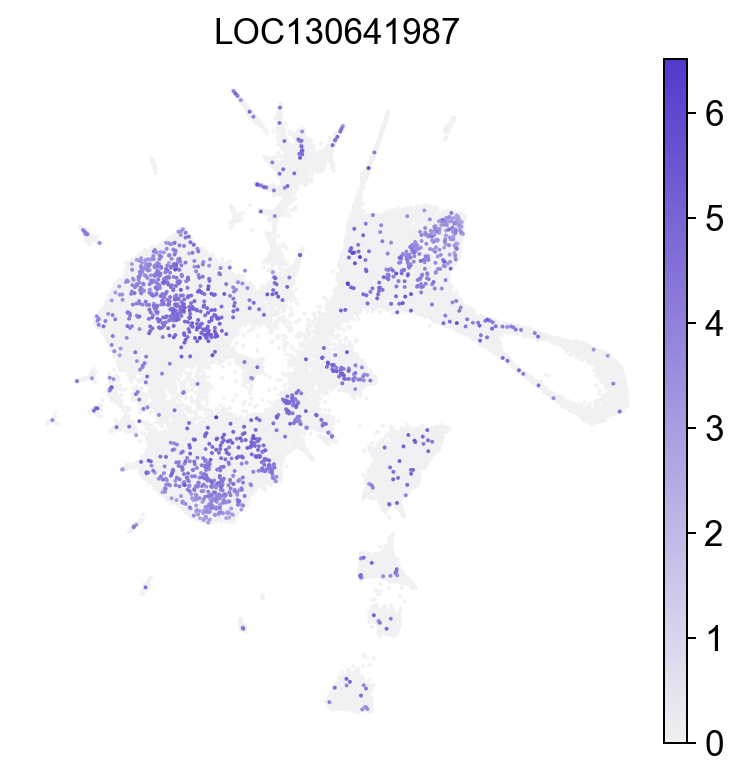

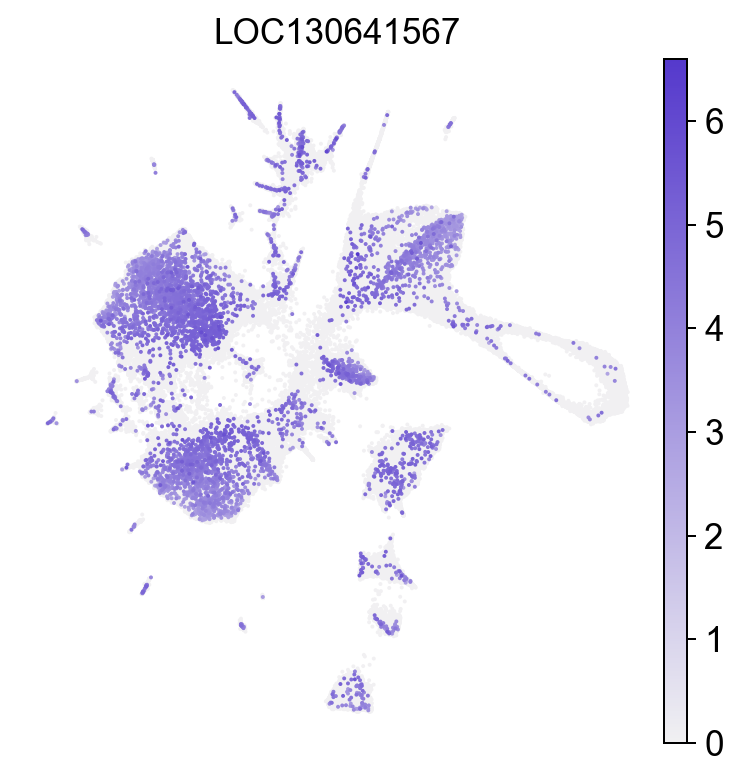

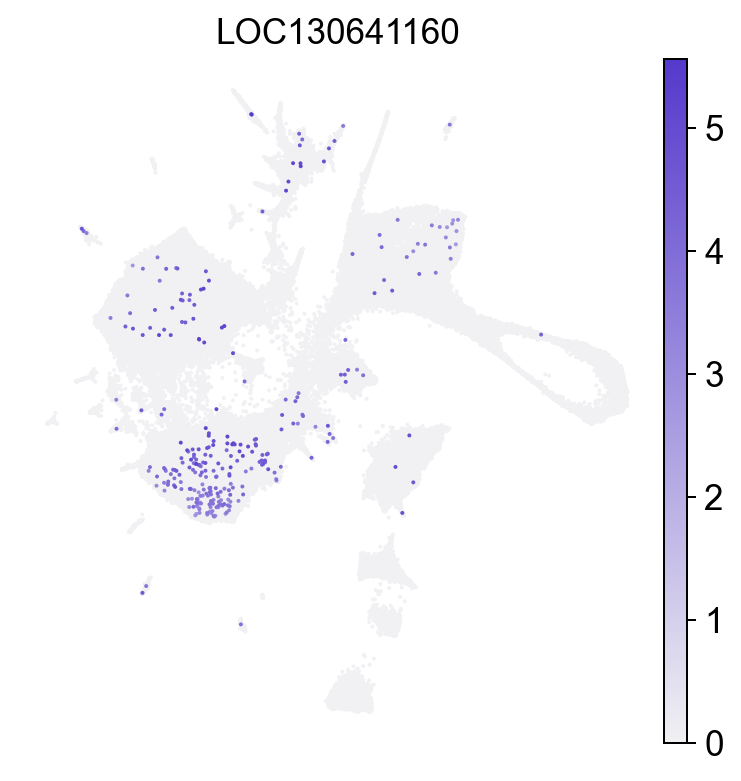

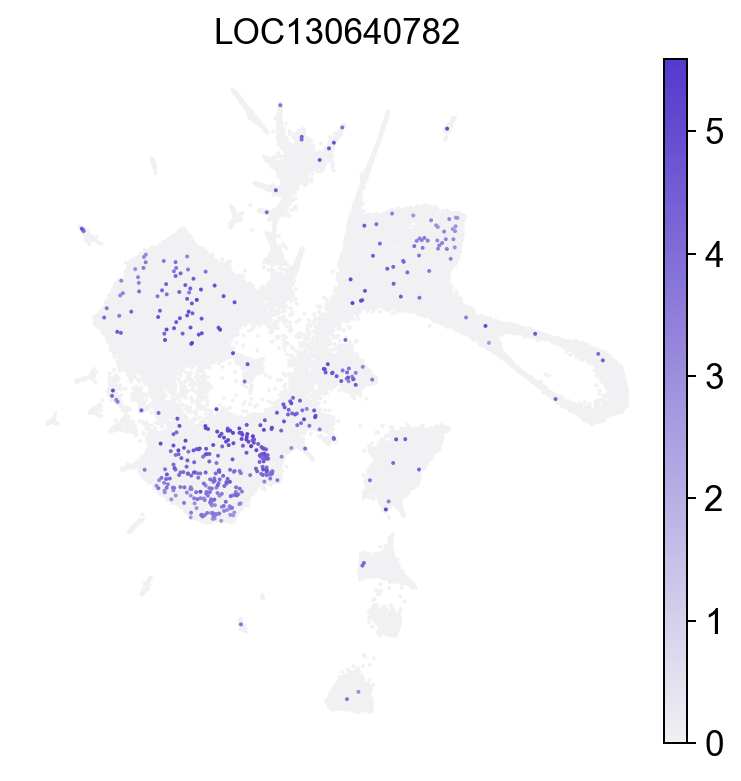

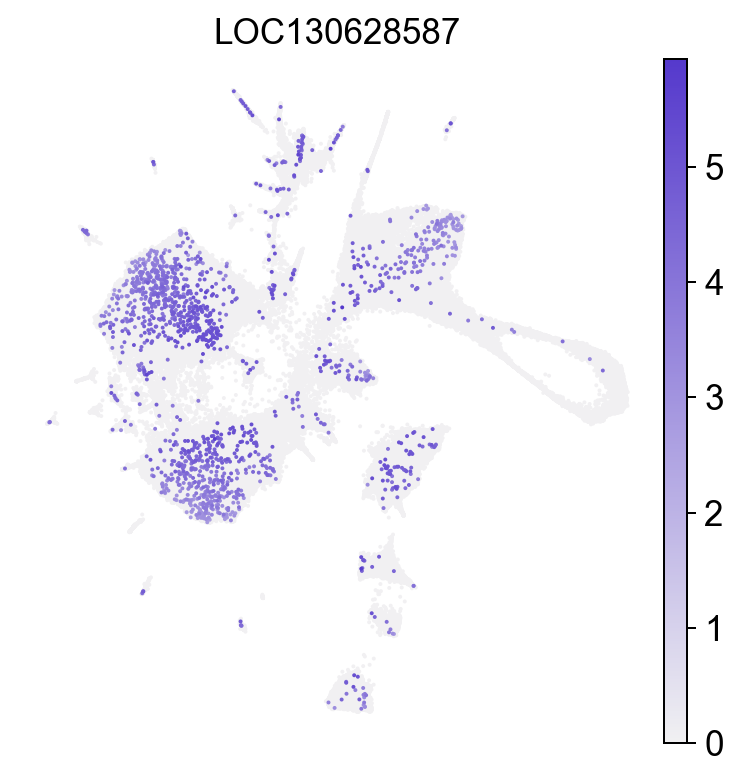

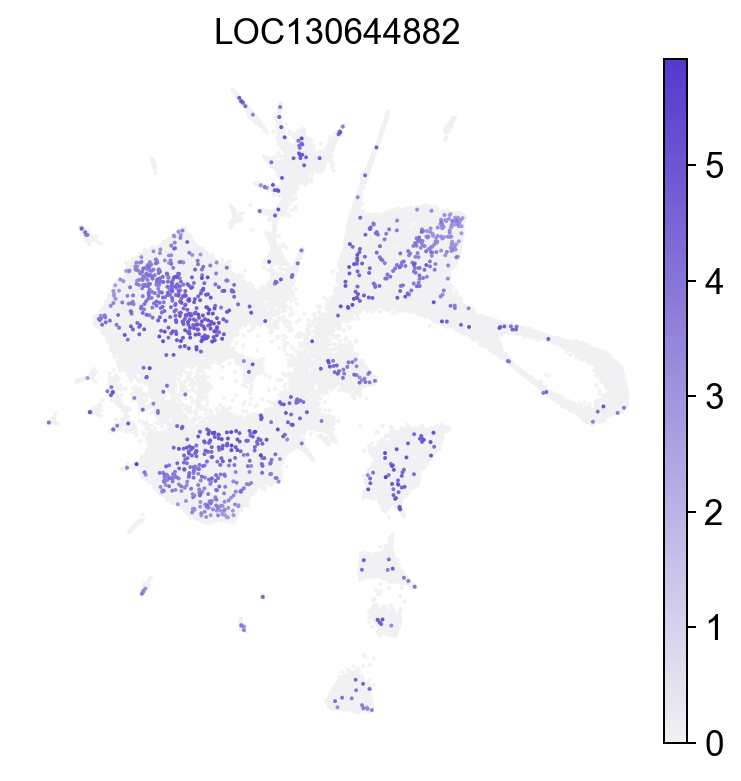

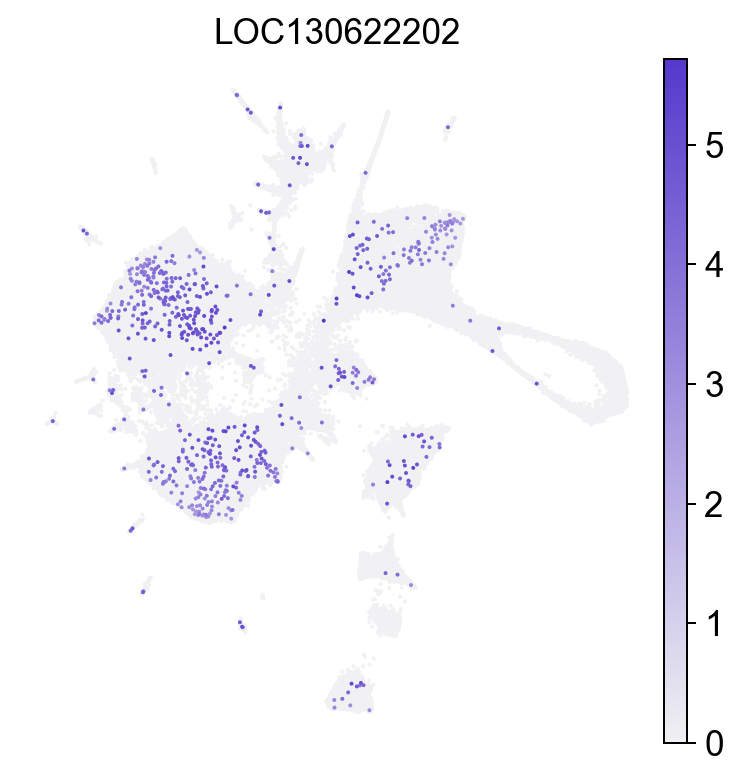

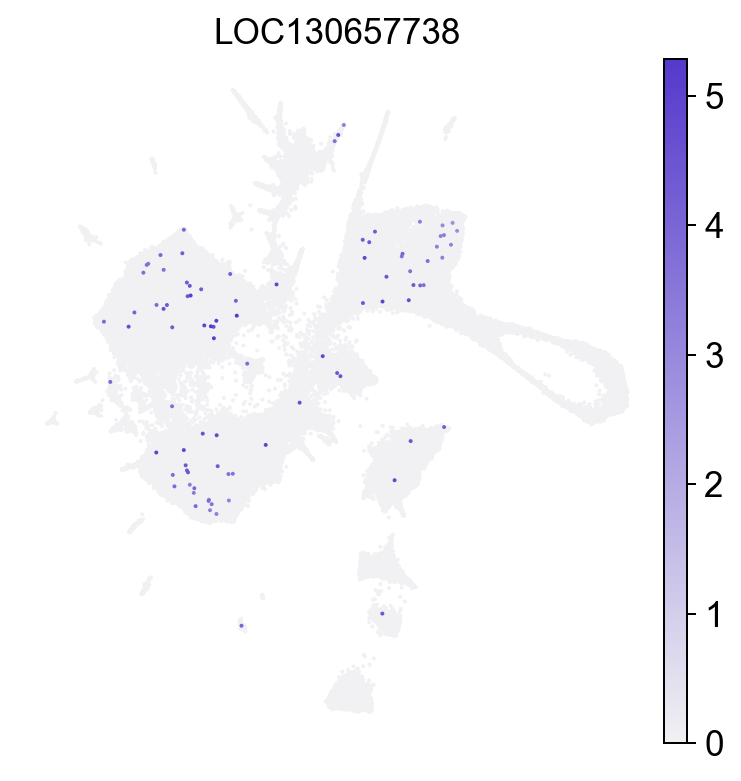

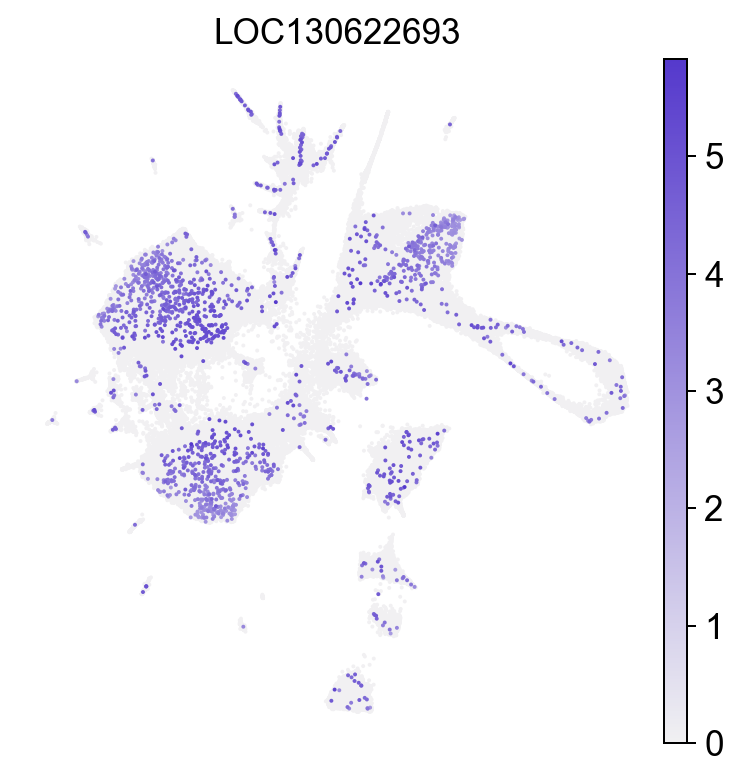

In [31]:
with rc_context({'figure.figsize': (5, 5)}):
    for i in range(len(markers_dic)):
        sc.pl.umap((mdata.mod['no']), color=markers_id[i], title= markers_names[i], ncols=3,
                   color_map = umap_cmap,size= 10, na_in_legend=False, frameon=False)

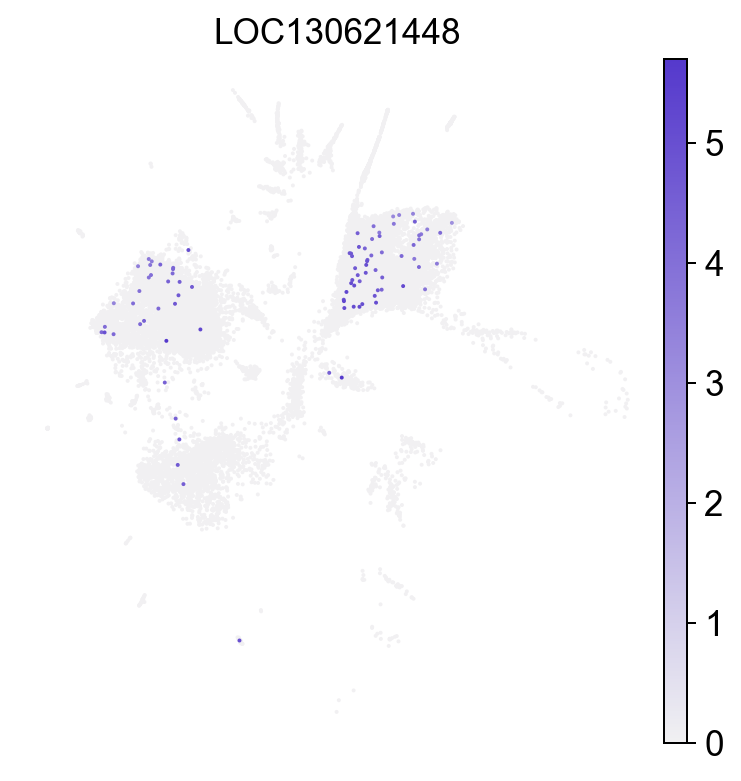

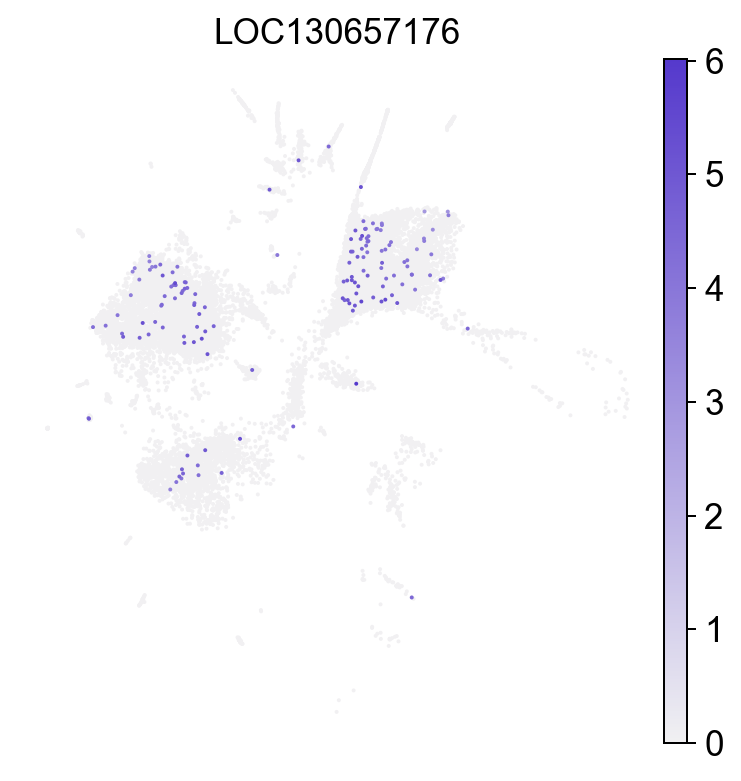

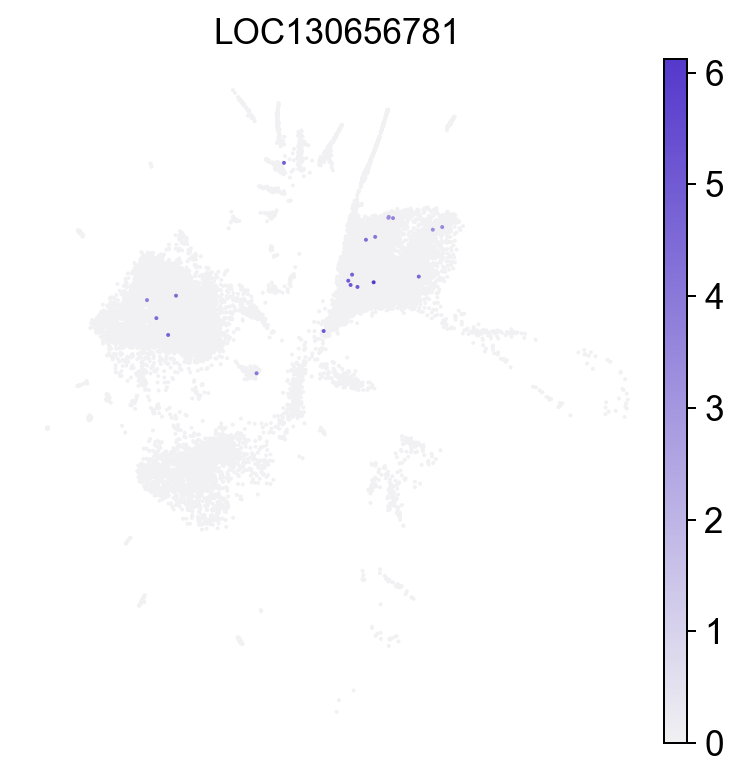

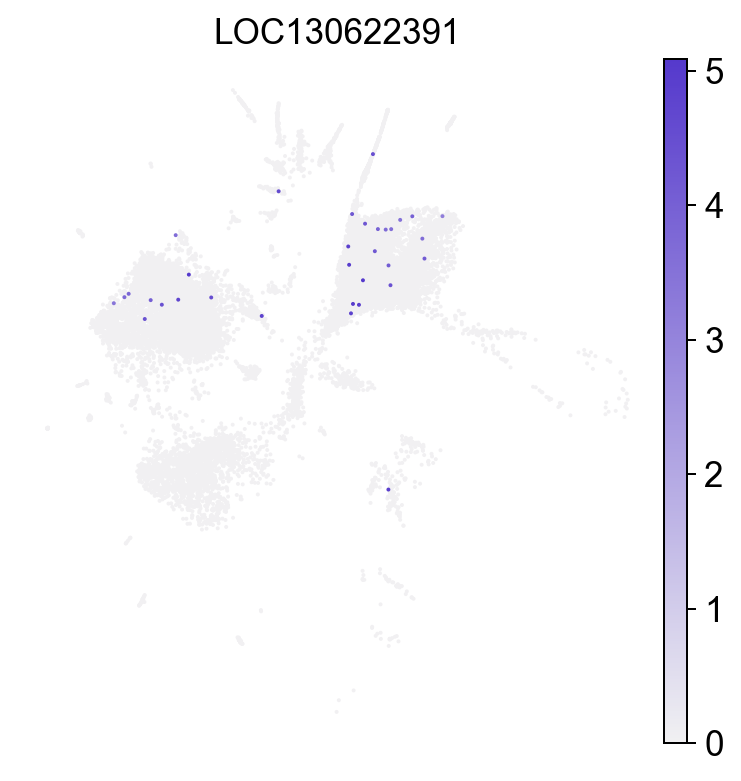

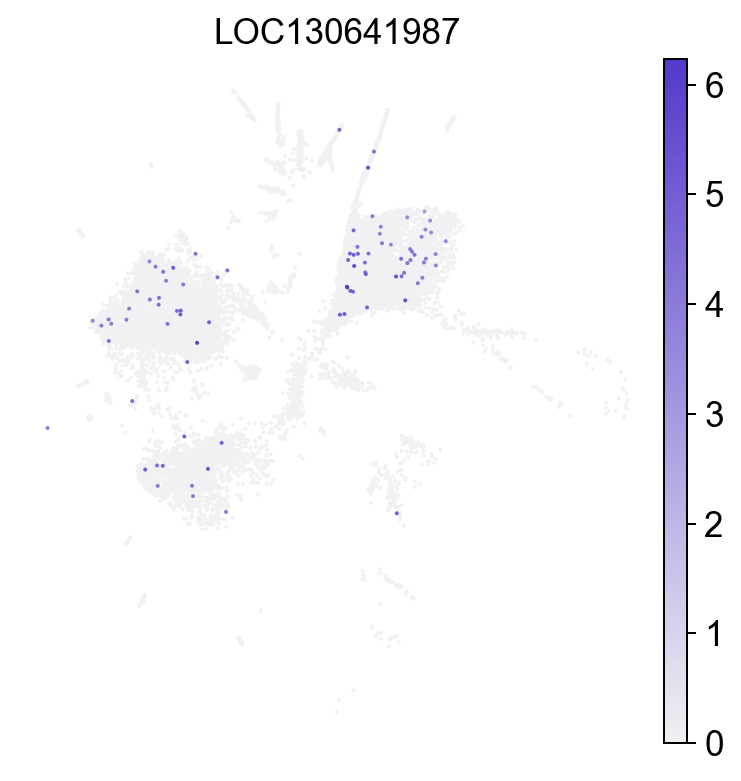

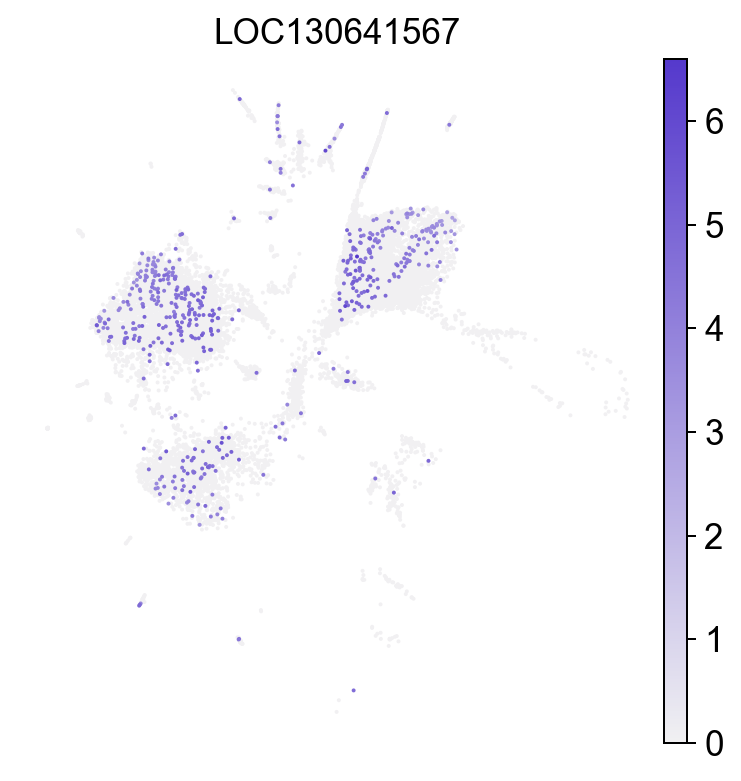

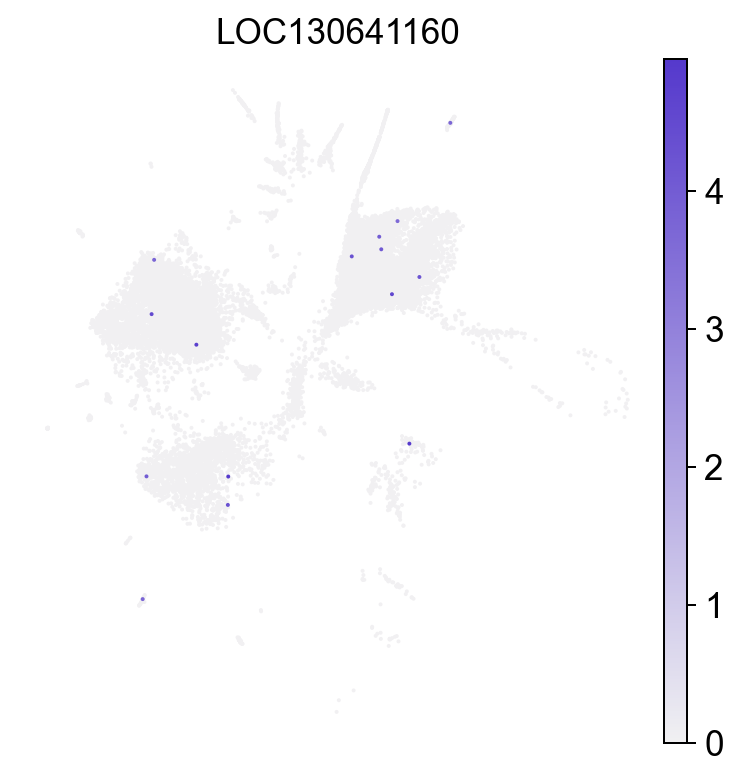

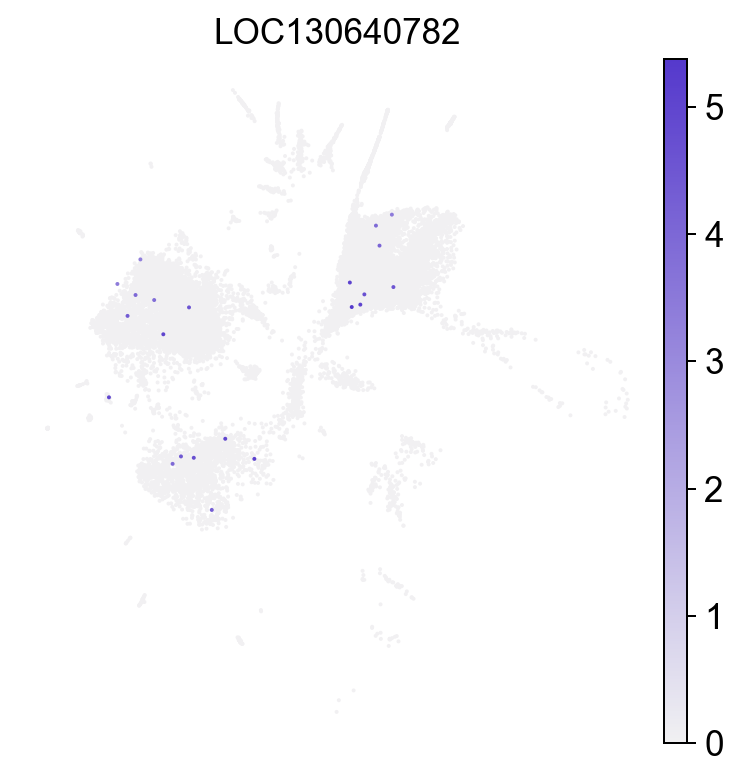

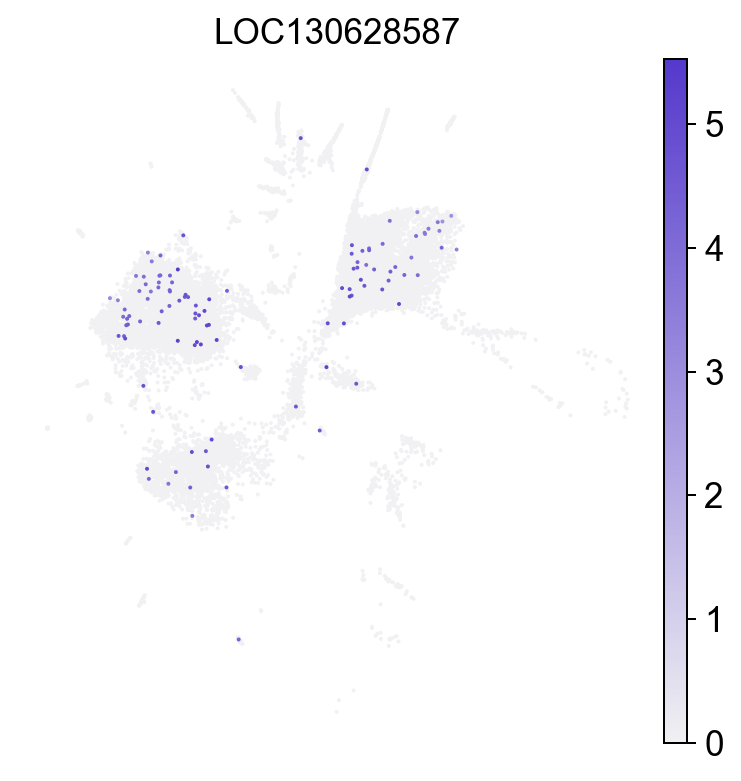

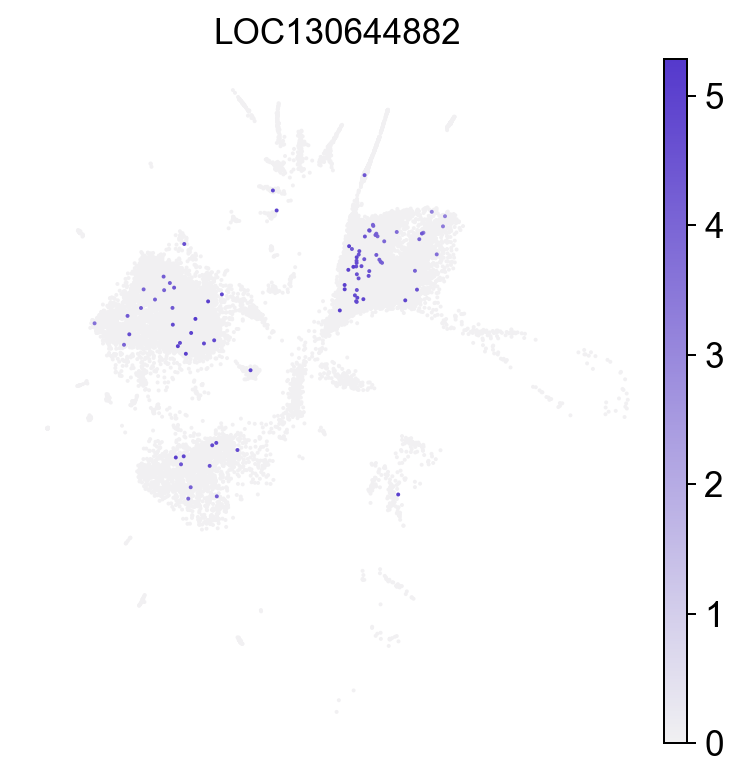

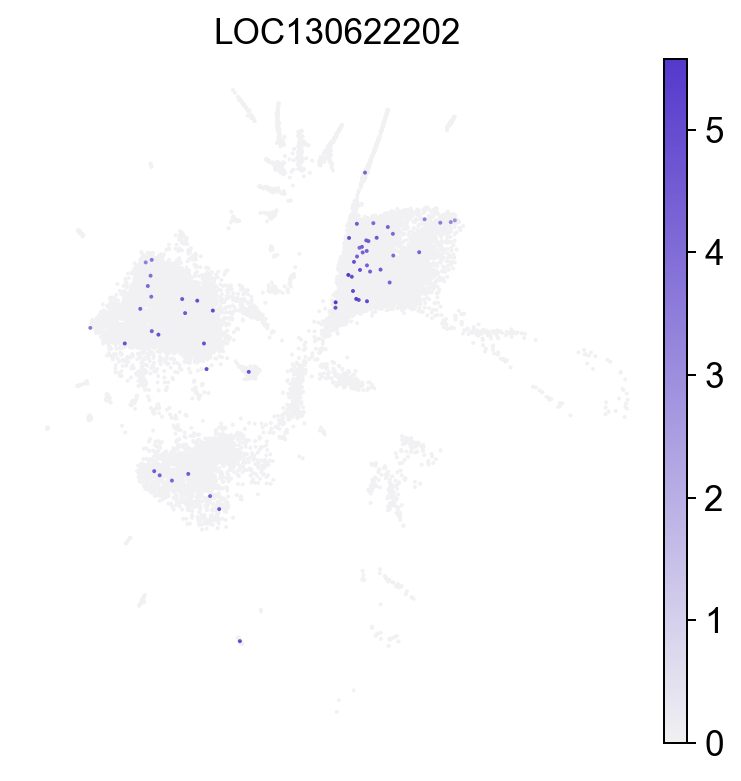

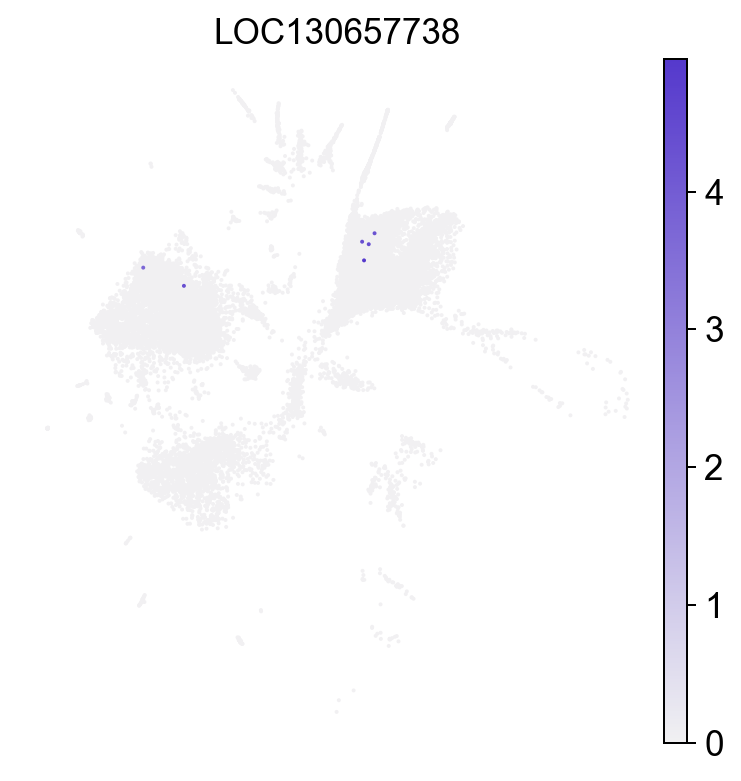

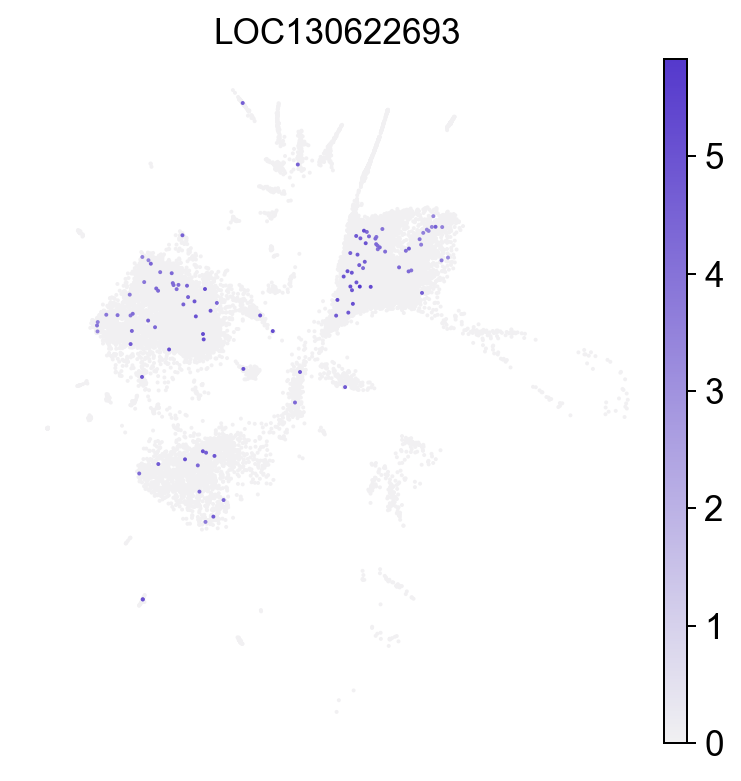

In [32]:
with rc_context({'figure.figsize': (5, 5)}):
    for i in range(len(markers_dic)):
        sc.pl.umap((mdataS.mod['no']), color=markers_id[i], title= markers_names[i], ncols=3,
                   color_map = umap_cmap,size= 10, na_in_legend=False, frameon=False)

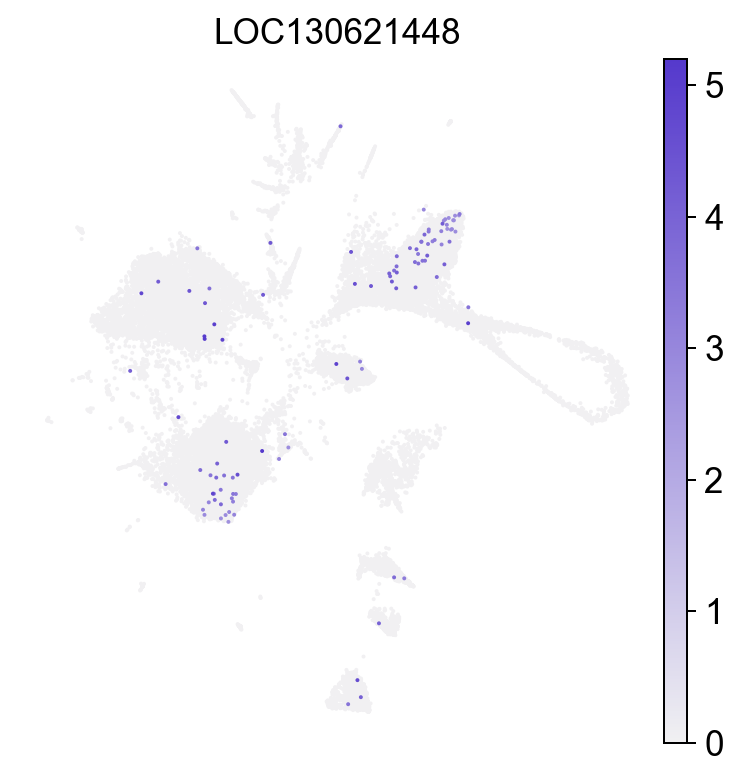

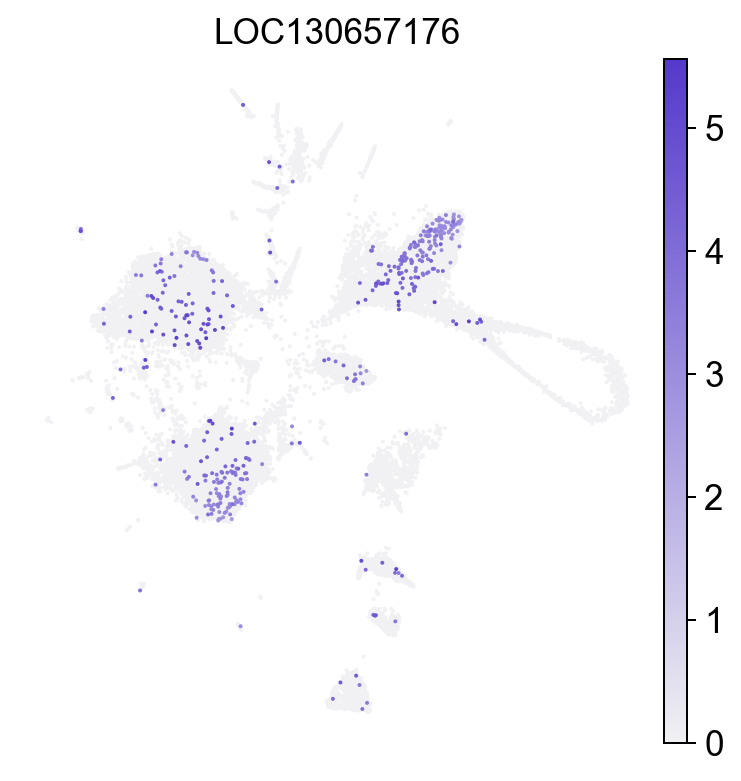

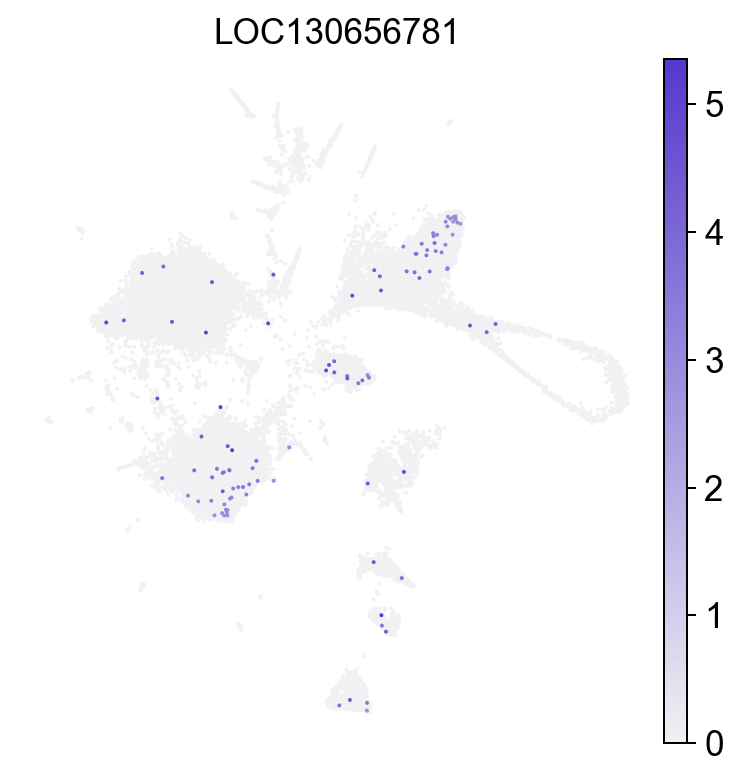

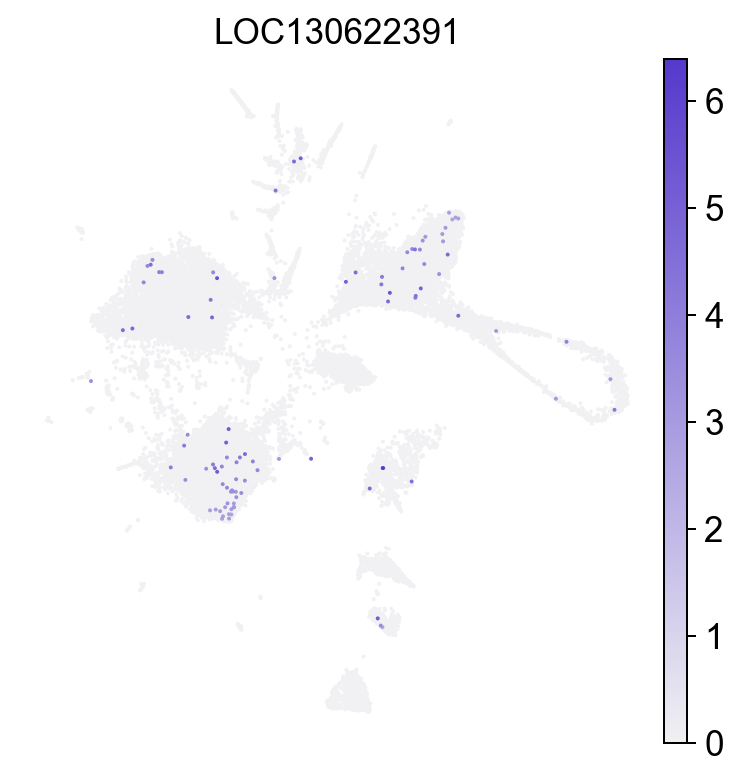

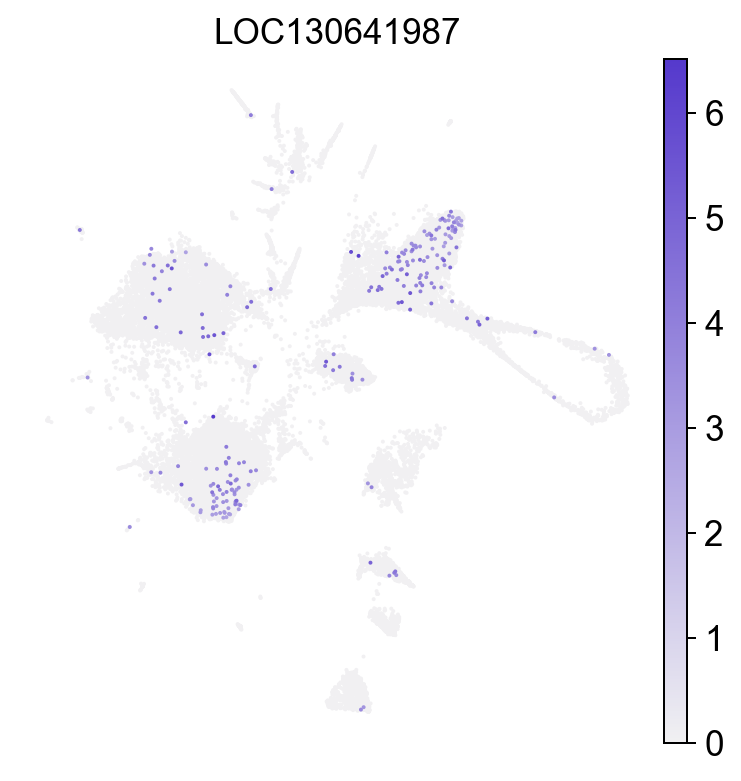

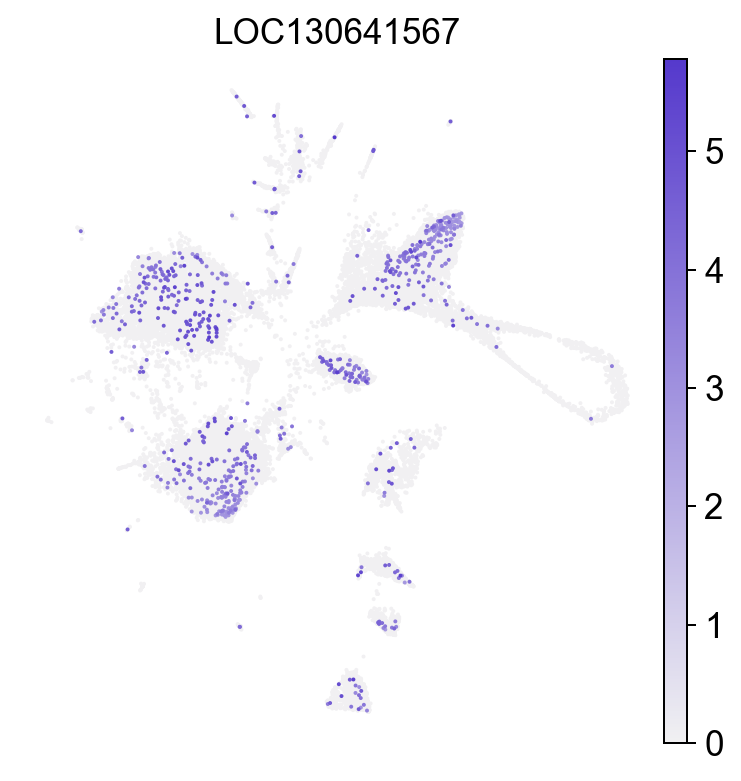

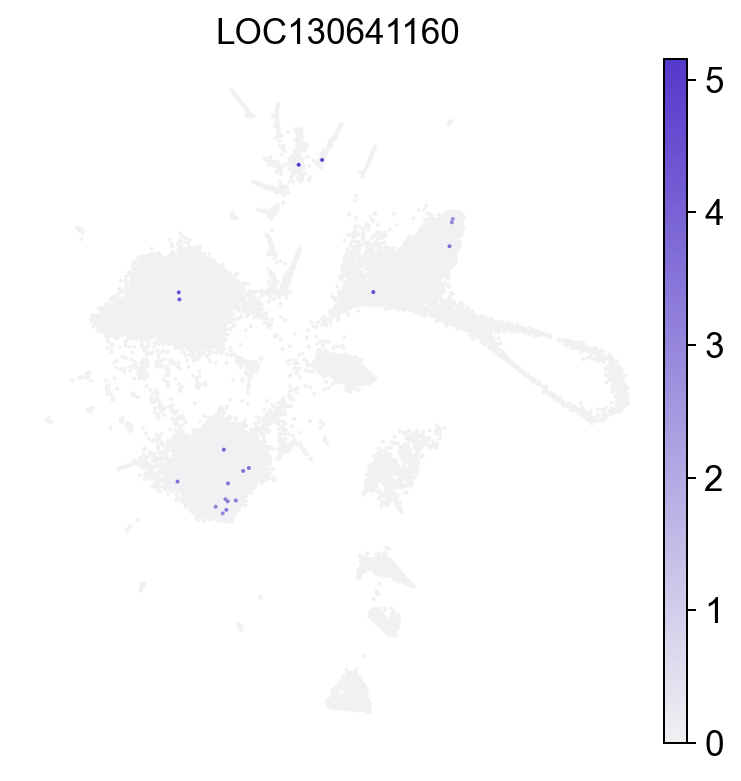

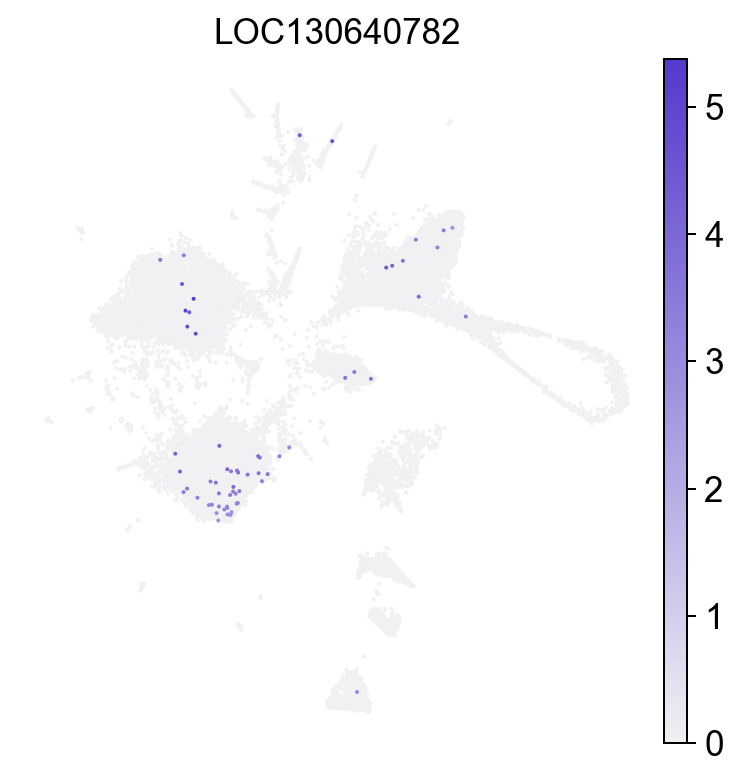

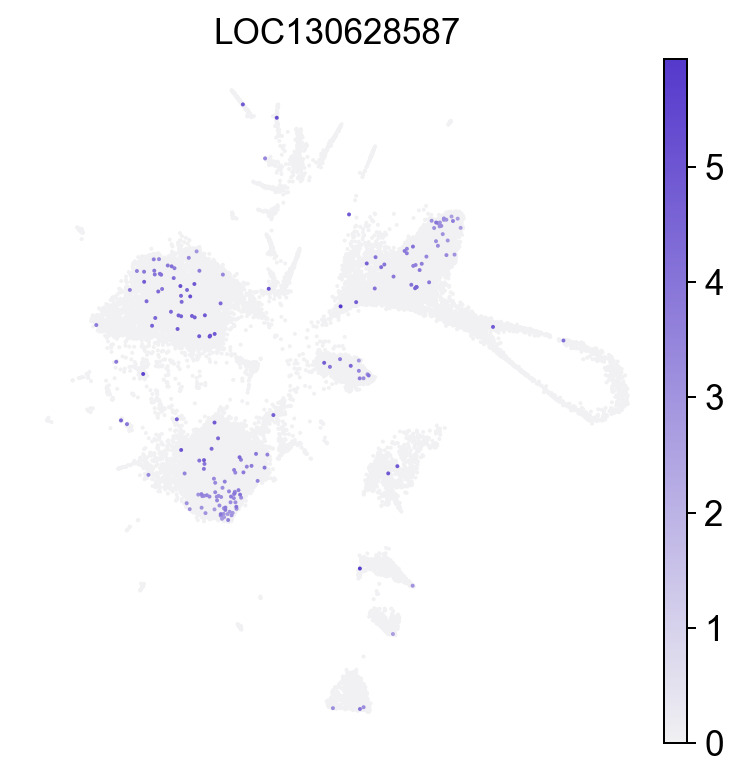

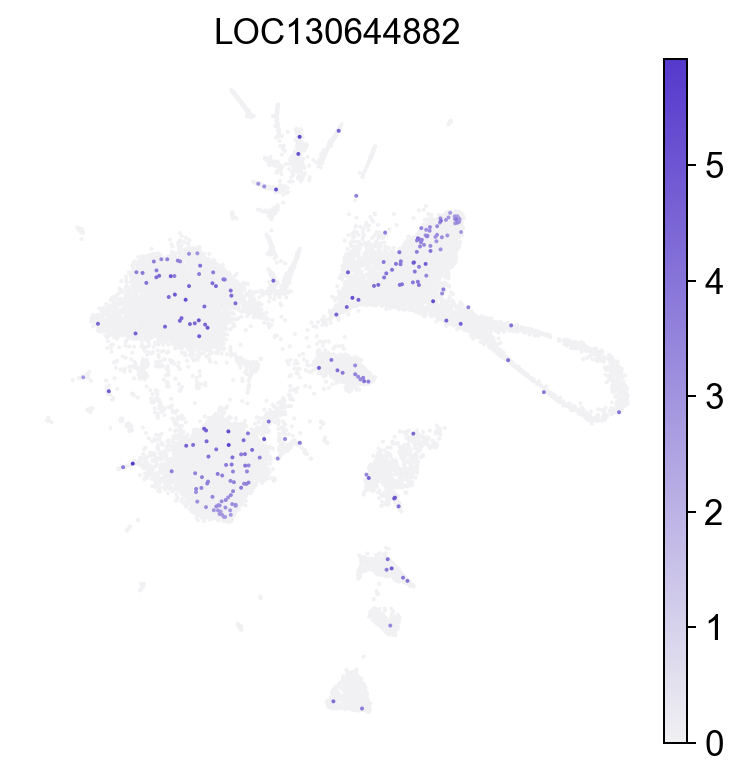

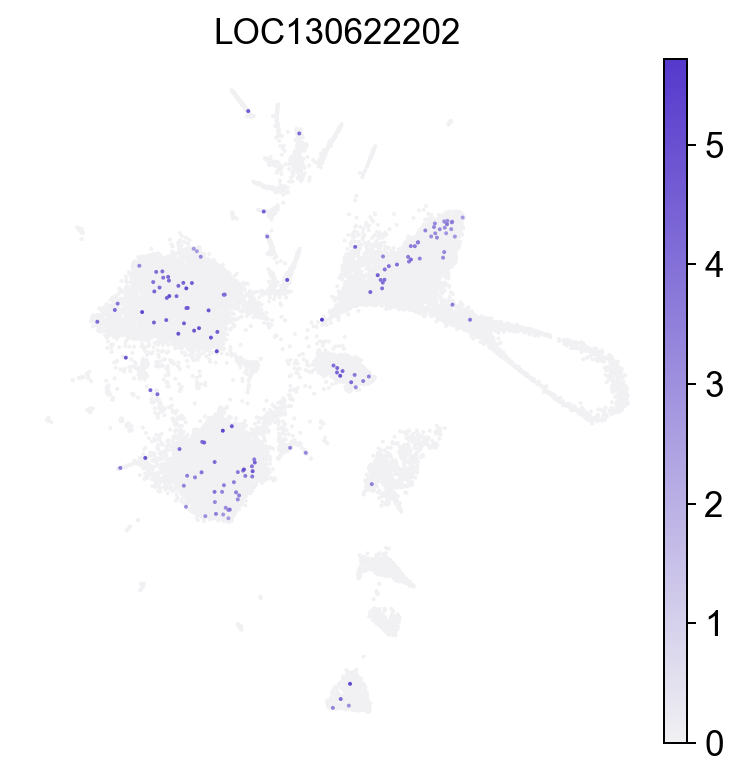

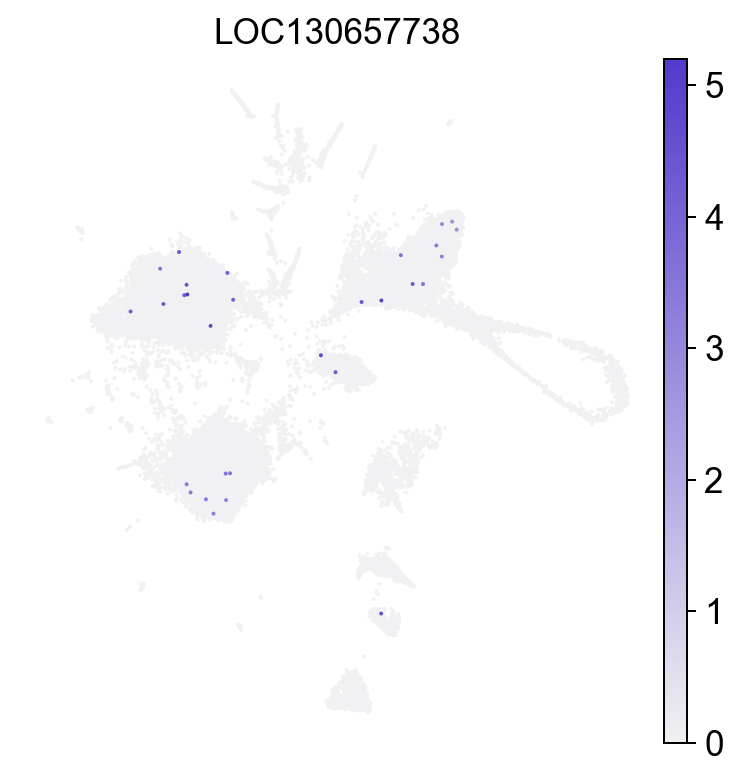

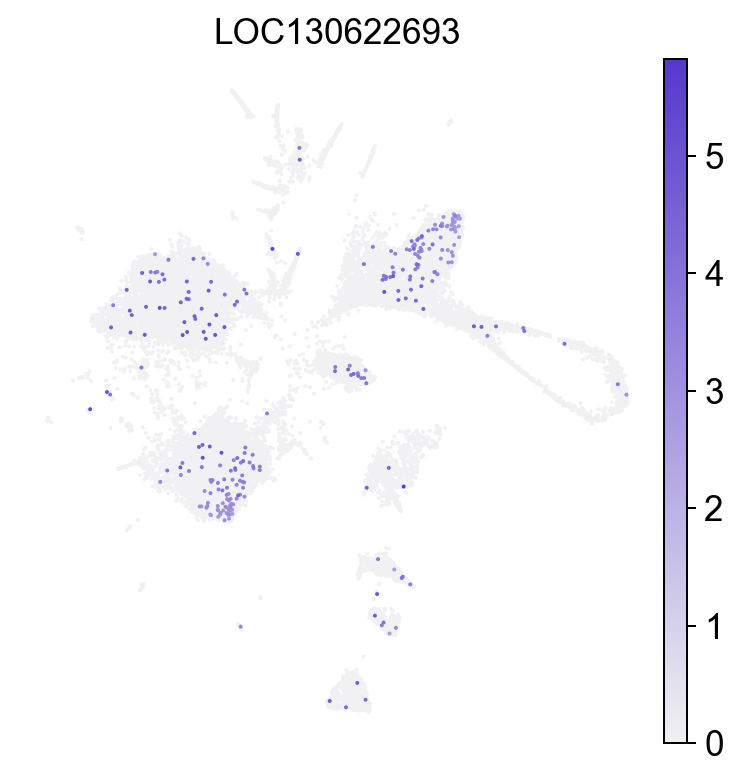

In [33]:
with rc_context({'figure.figsize': (5, 5)}):
    for i in range(len(markers_dic)):
        sc.pl.umap((mdataF.mod['no']), color=markers_id[i], title= markers_names[i], ncols=3,
                   color_map = umap_cmap,size= 10, na_in_legend=False, frameon=False)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


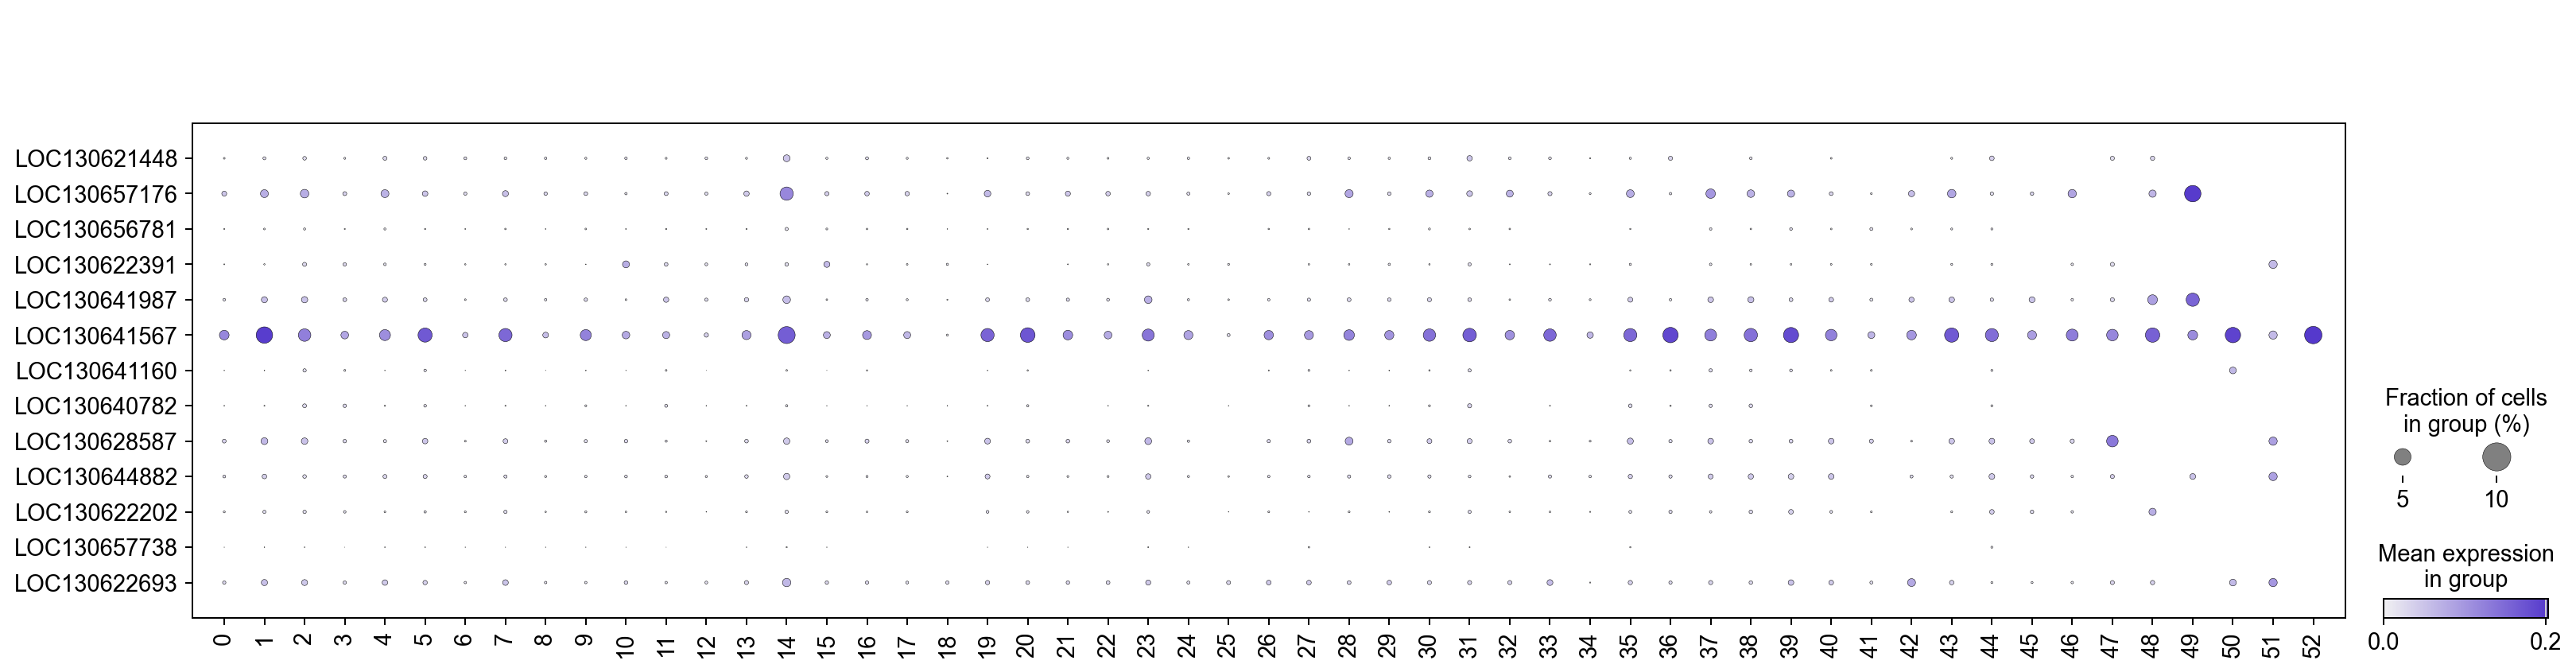

In [34]:
sc.pl.dotplot((mdata.mod['no']), markers_id, groupby='leiden_1.5', dendrogram=False, swap_axes = True, cmap = umap_cmap)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


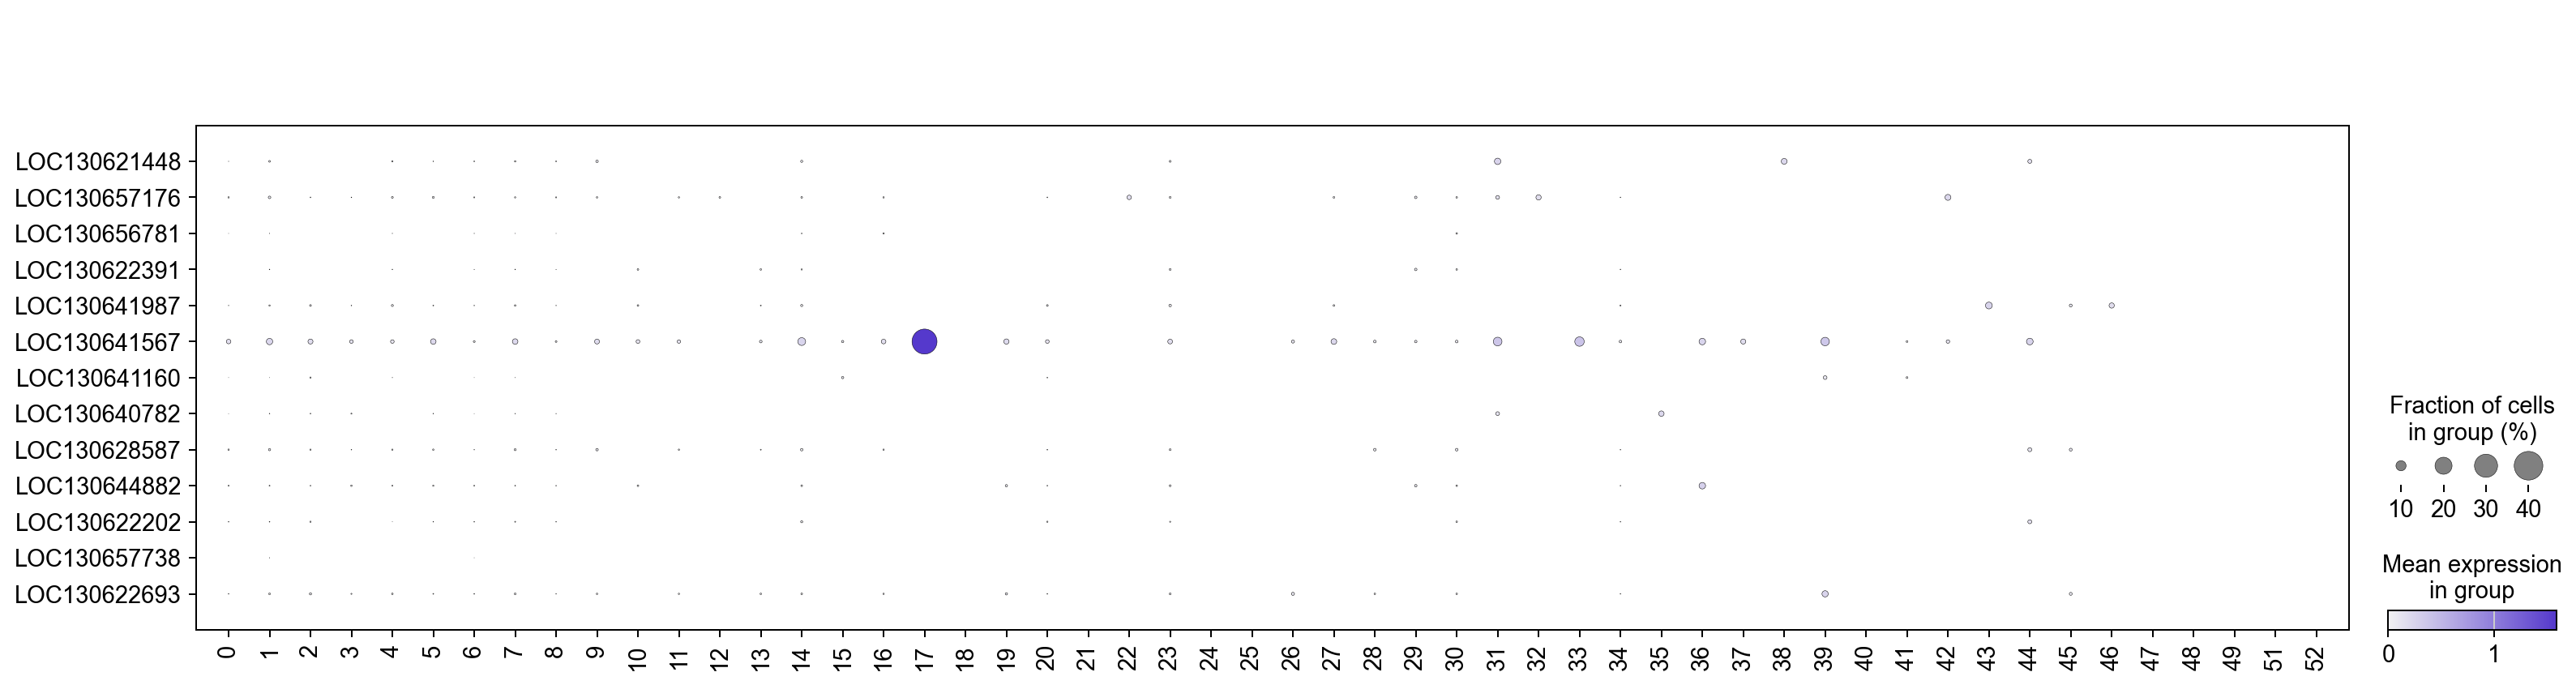

In [35]:
sc.pl.dotplot((mdataS.mod['no']), markers_id, groupby='leiden_1.5', dendrogram=False, swap_axes = True, cmap = umap_cmap)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


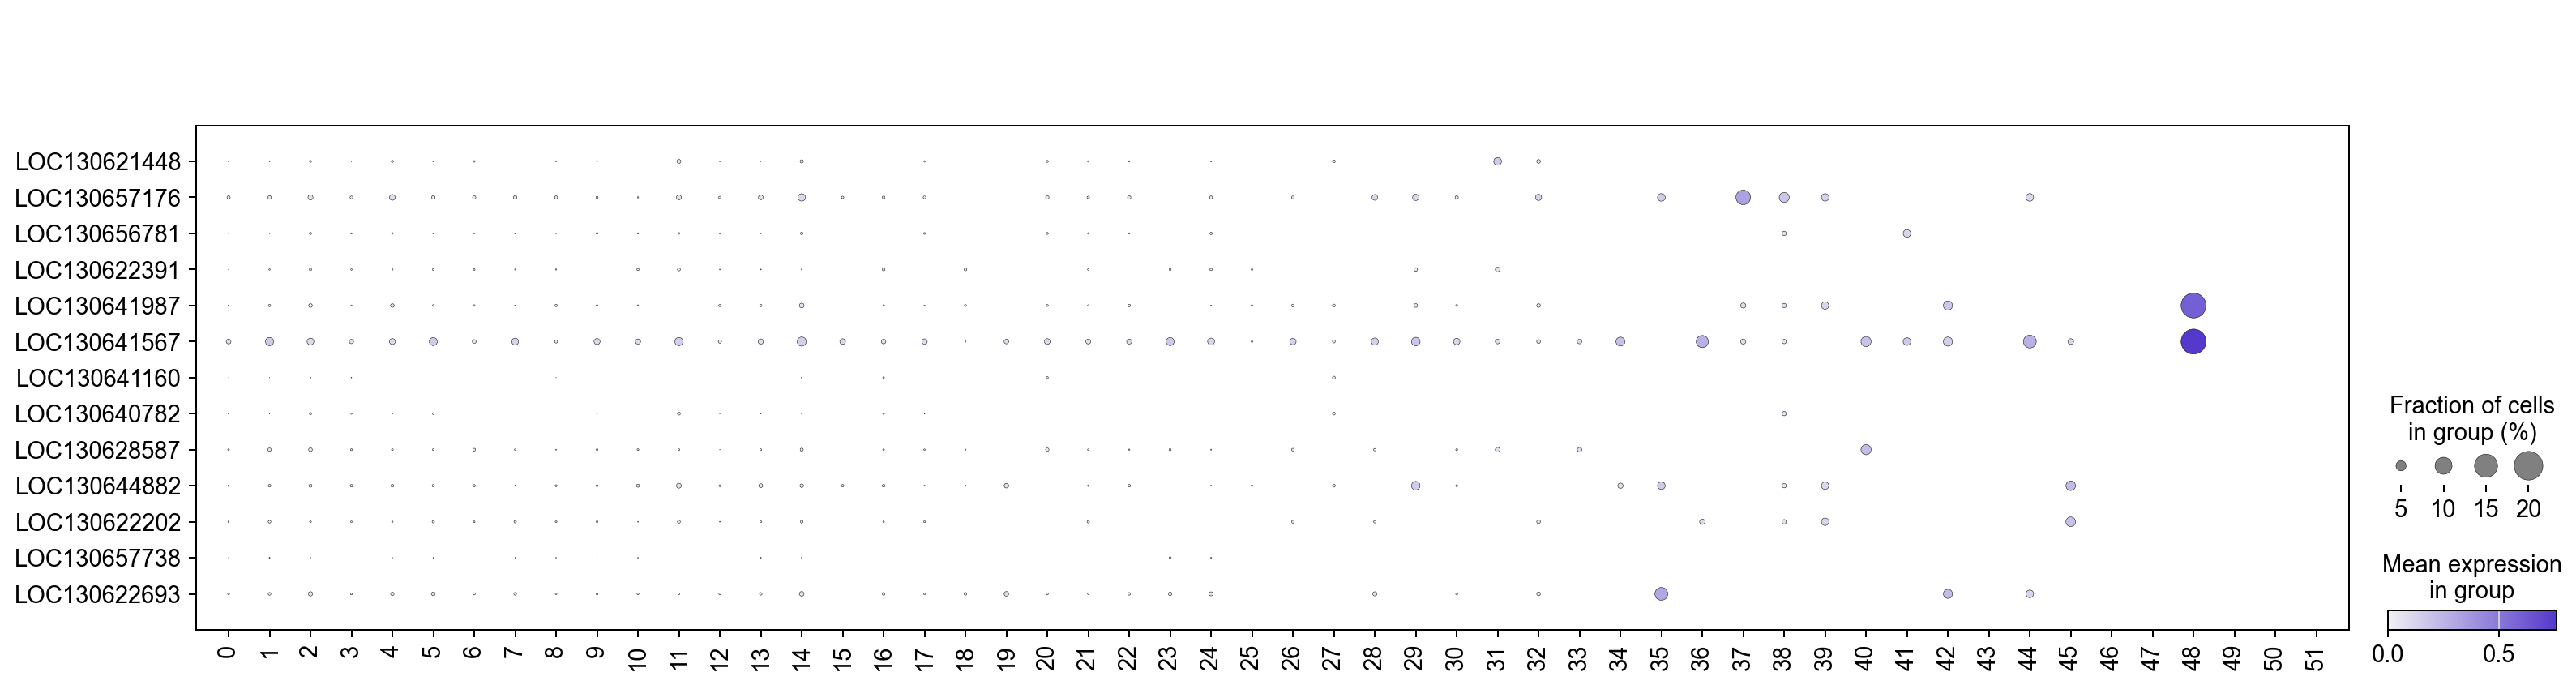

In [36]:
sc.pl.dotplot((mdataF.mod['no']), markers_id, groupby='leiden_1.5', dendrogram=False, swap_axes = True, cmap = umap_cmap)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


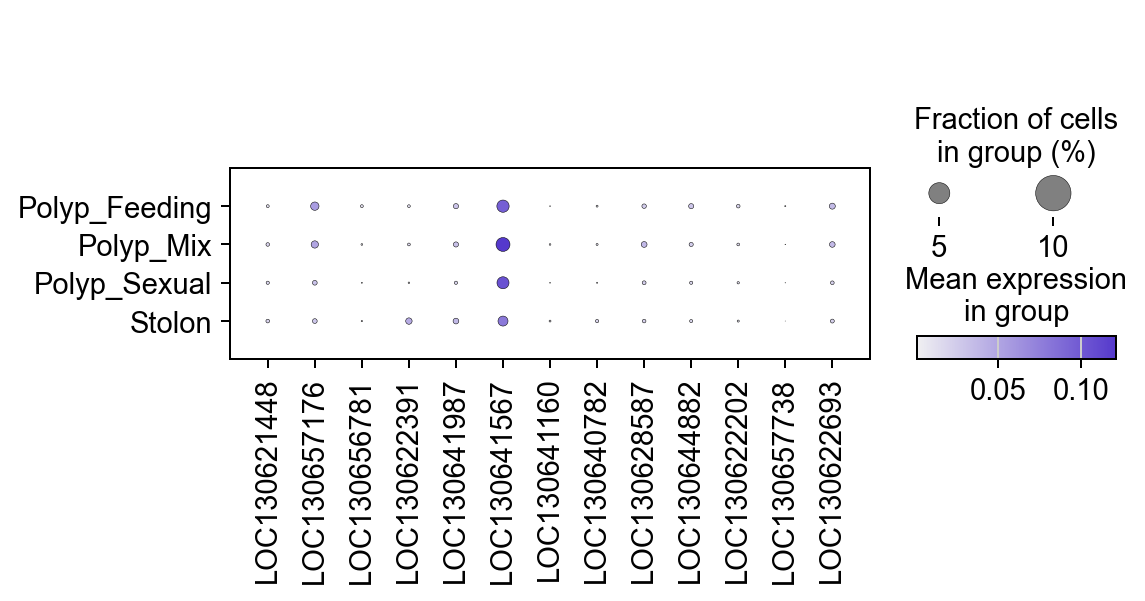

In [37]:
sc.pl.dotplot((mdata.mod['no']), markers_id, groupby='Colony_part', dendrogram=False, swap_axes = False, cmap = umap_cmap)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


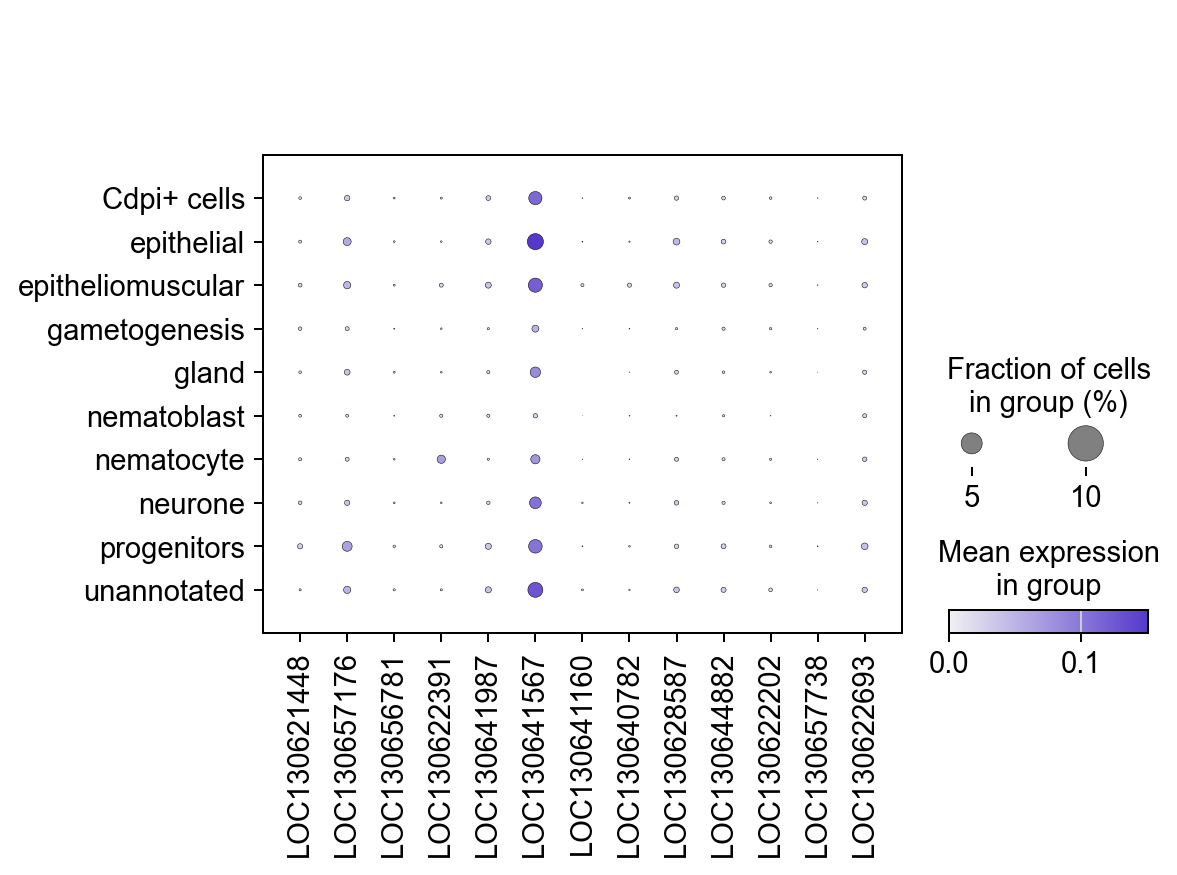

In [38]:
sc.pl.dotplot((mdata.mod['no']), markers_id, groupby='broad_names', dendrogram=False, swap_axes = False, cmap = umap_cmap)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


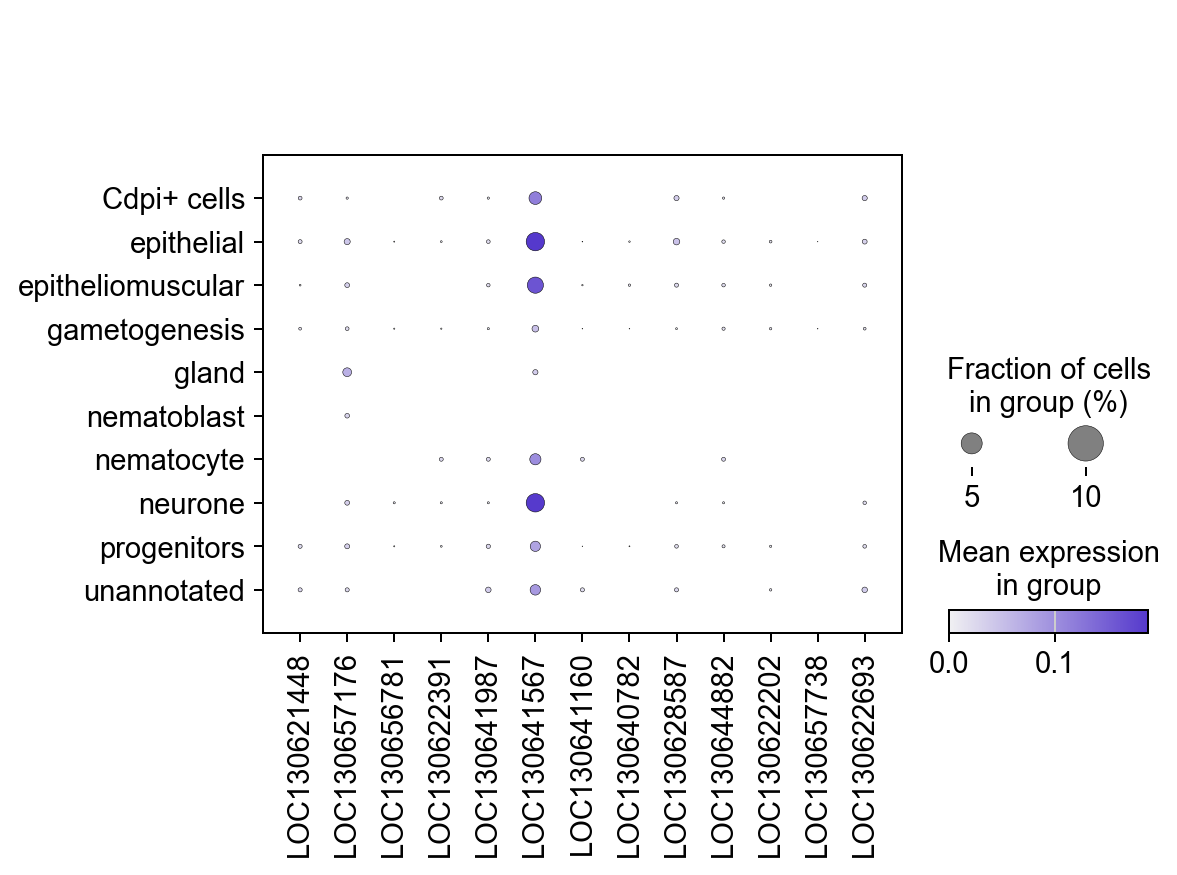

In [39]:
sc.pl.dotplot((mdataS.mod['no']), markers_id, groupby='broad_names', dendrogram=False, swap_axes = False, cmap = umap_cmap)

/opt/miniconda3/envs/SPLiTnew/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


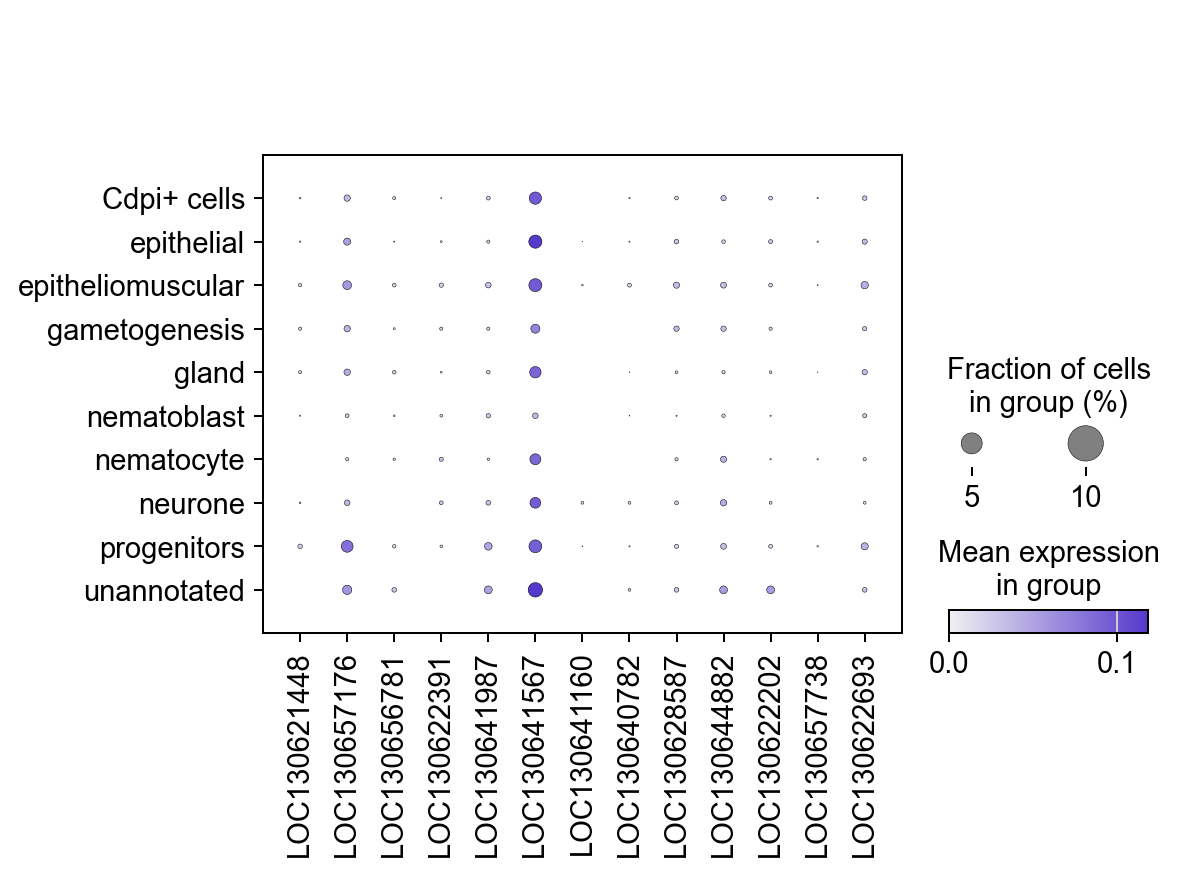

In [40]:
sc.pl.dotplot((mdataF.mod['no']), markers_id, groupby='broad_names', dendrogram=False, swap_axes = False, cmap = umap_cmap)